# EDA


Encoding for Gender:
Male -> 1
Female -> 0

Encoding for Father's Education:
MS -> 2
BS -> 0
Matric -> 3
Intermediate -> 1
PhD/ Doctor -> 4

Encoding for Mother's Education:
PhD/ Doctor -> 5
Intermediate -> 2
Matric -> 4
BS -> 0
MS -> 3
Below Matric -> 1

Encoding for guidance:
YES -> 1
NO -> 0

Encoding for  scholarship:
YES -> 1
NO -> 0

Encoding for I opted for this program of study because of my own interest.:
Agree -> 0
Strongly Agree -> 3
Neutral -> 2
Disagree -> 1
Strongly disagree -> 4

Encoding for Basic Education:
Matric -> 1
Cambridge -> 0

Encoding for Intermediate :
FSc/ ICS -> 1
A-Level -> 0

Encoding for  lecture language:
both -> 2
Urdu -> 1
English -> 0

Encoding for lecture mode:
none -> 3
Whiteboard -> 1
both -> 2
Power point -> 0

Encoding for sitting place:
front -> 1
none -> 3
middle -> 2
back -> 0

Encoding for lecture duration:
1 hour -> 0
none -> 2
1.5 hour -> 1

Encoding for number of students:
none -> 3
30 -> 0
40 -> 1
50 -> 2

Encoding for lecture material:

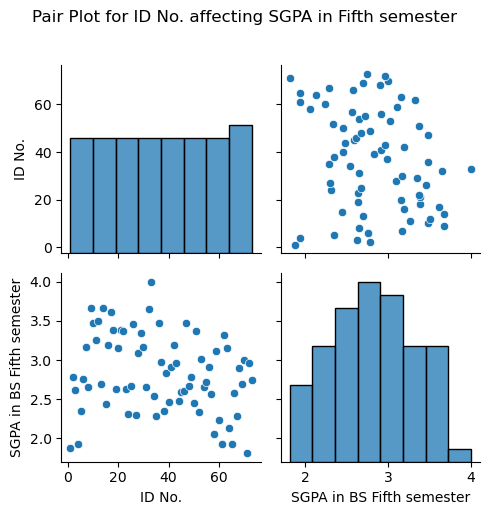

Feature 1


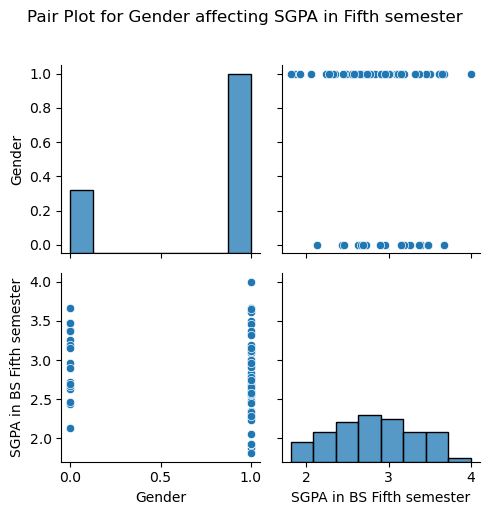

Feature 2


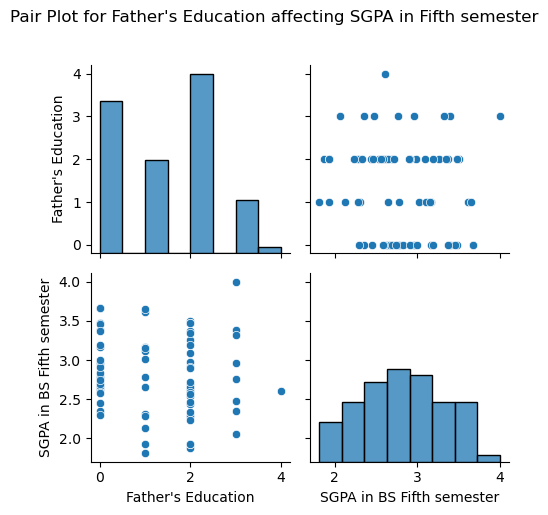

Feature 3


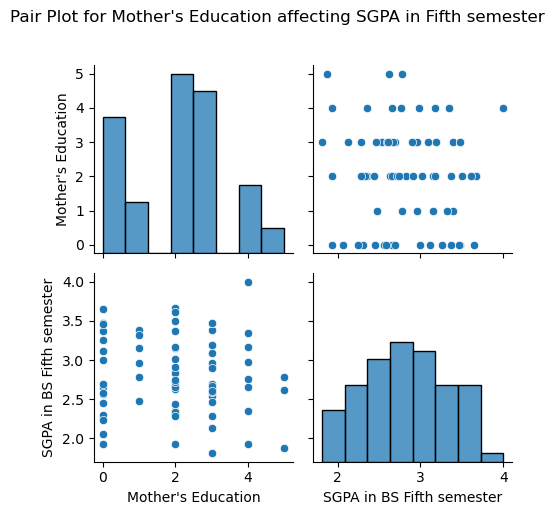

Feature 4


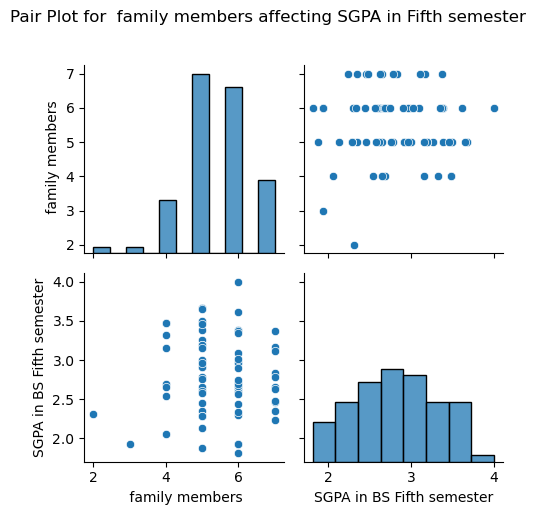

Feature 5


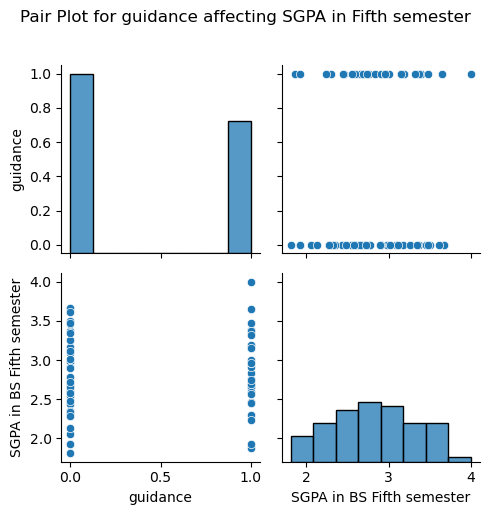

Feature 6


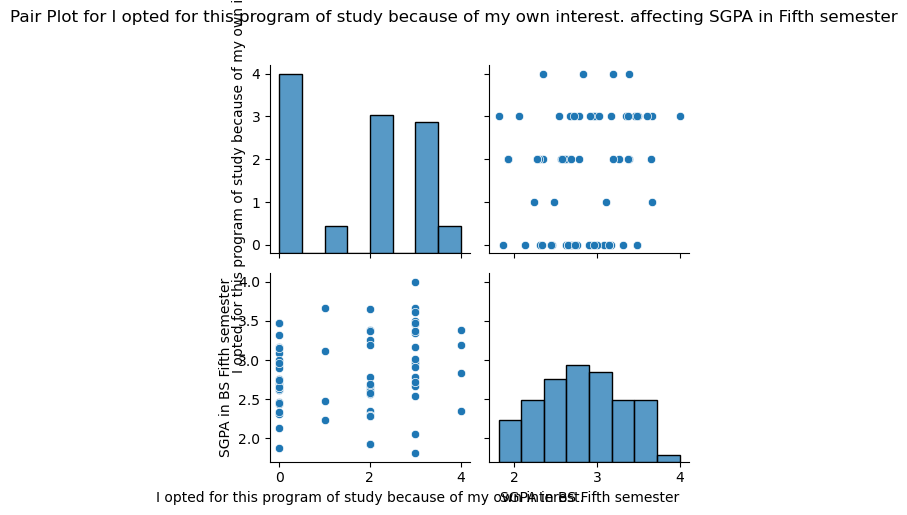

Feature 7


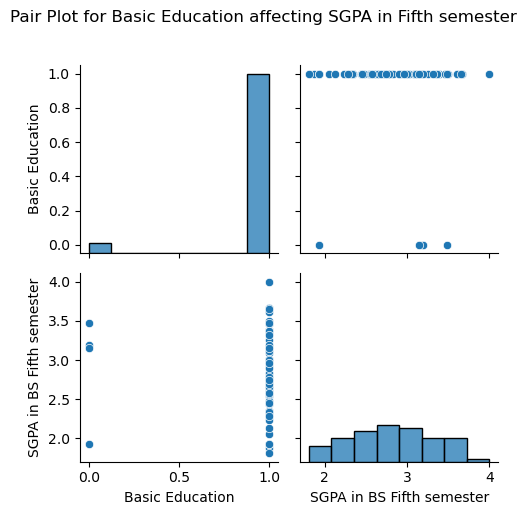

Feature 8


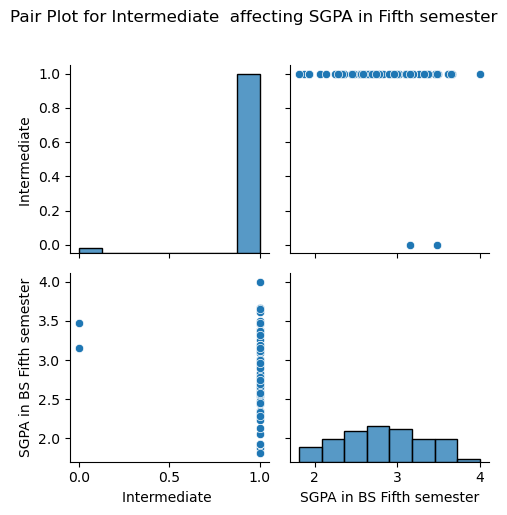

Feature 9


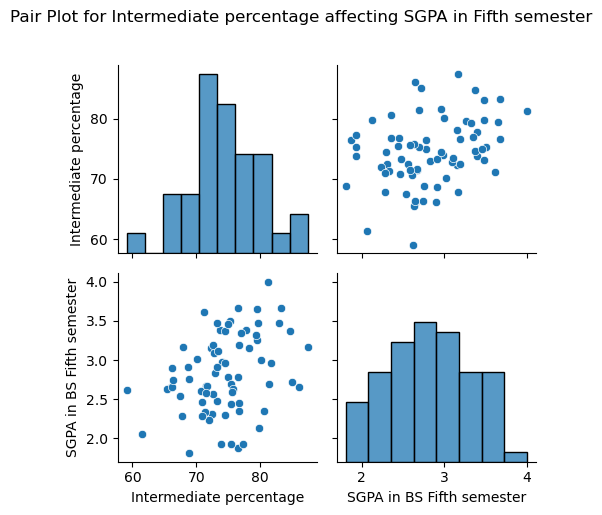

Feature 10


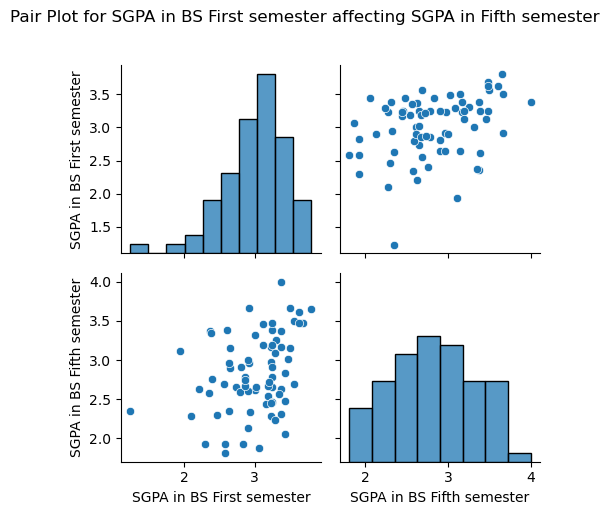

Feature 11


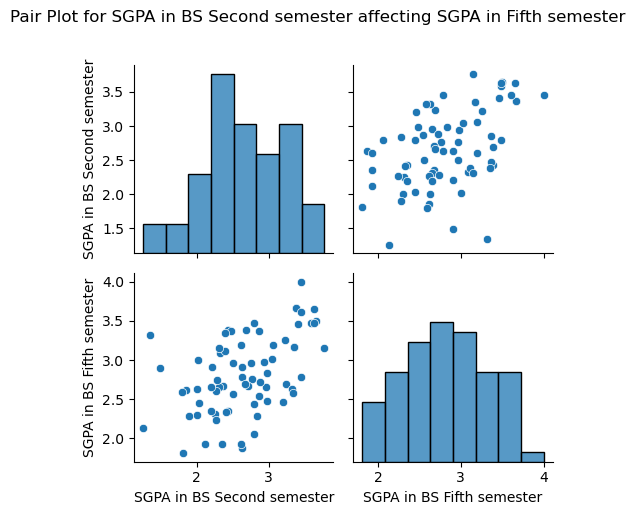

Feature 12


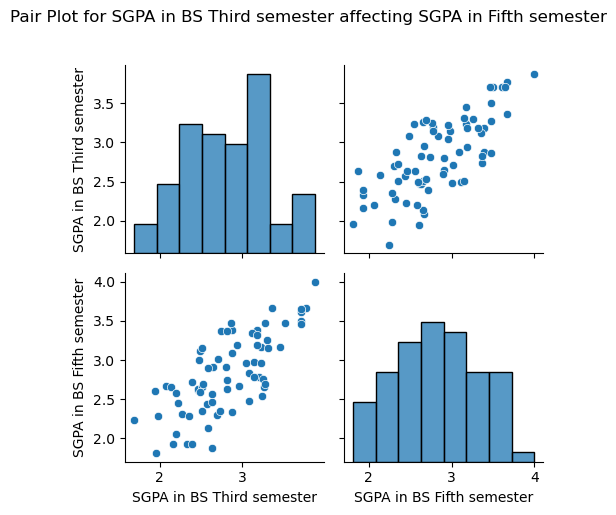

Feature 13


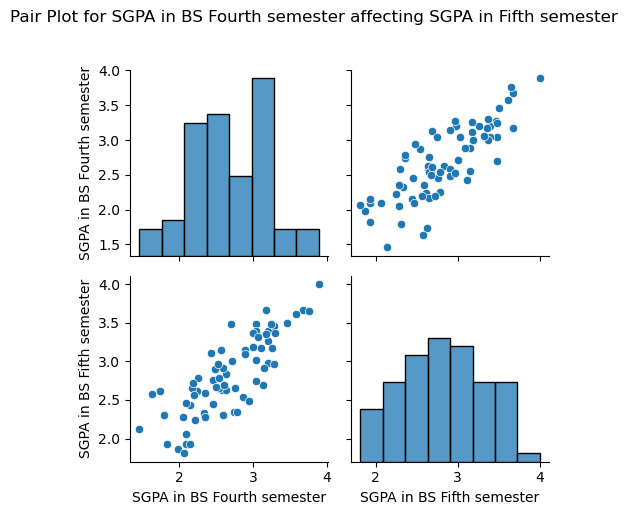

Feature 14


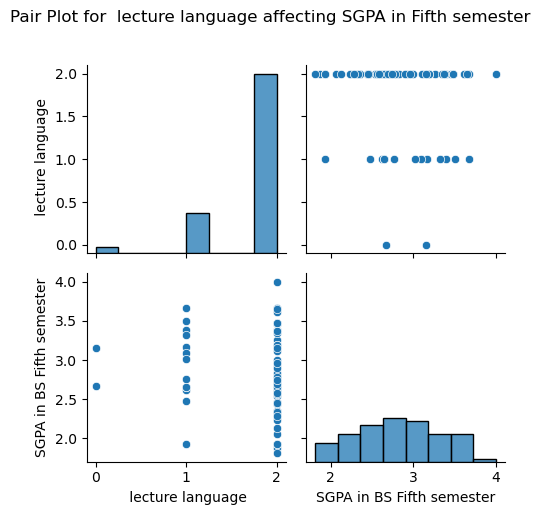

Feature 15


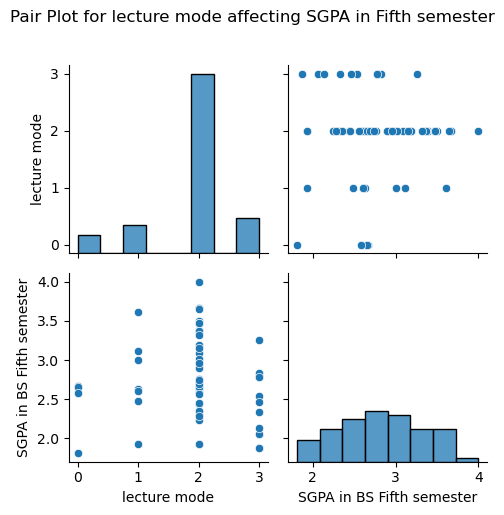

Feature 16


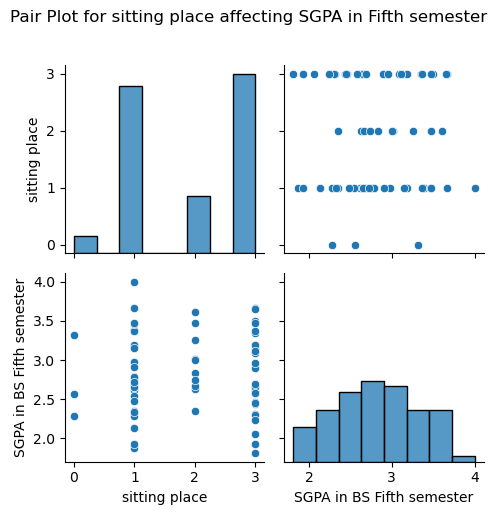

Feature 17


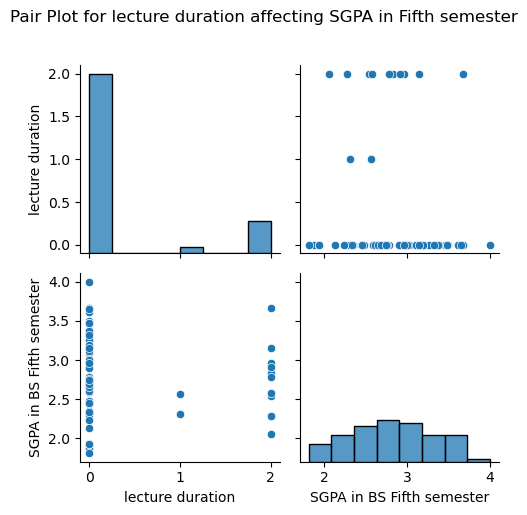

Feature 18


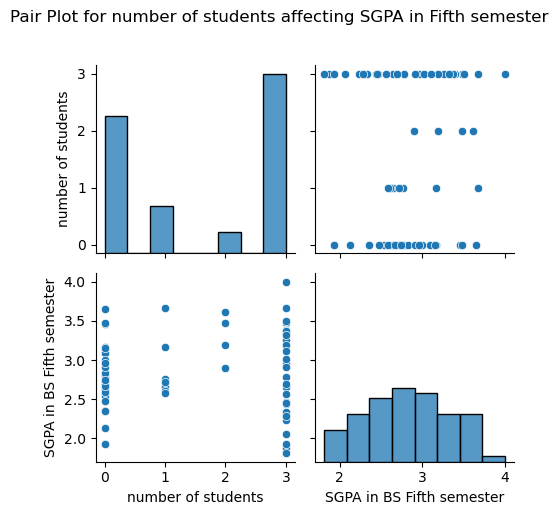

Feature 19


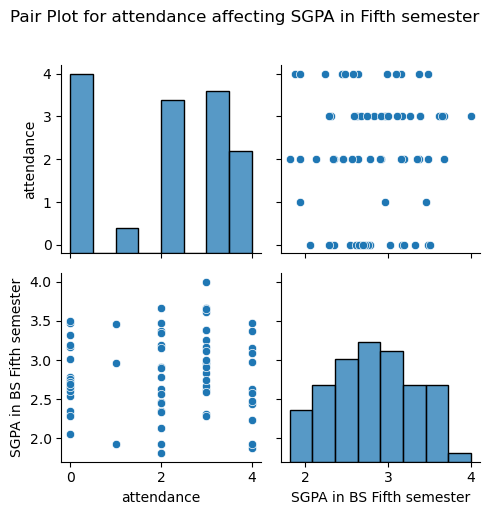

Feature 20


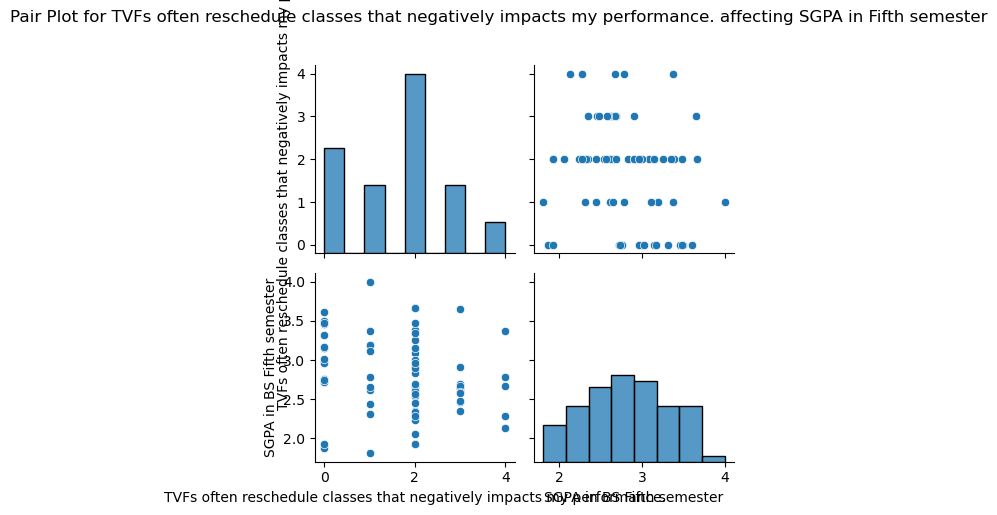

Feature 21


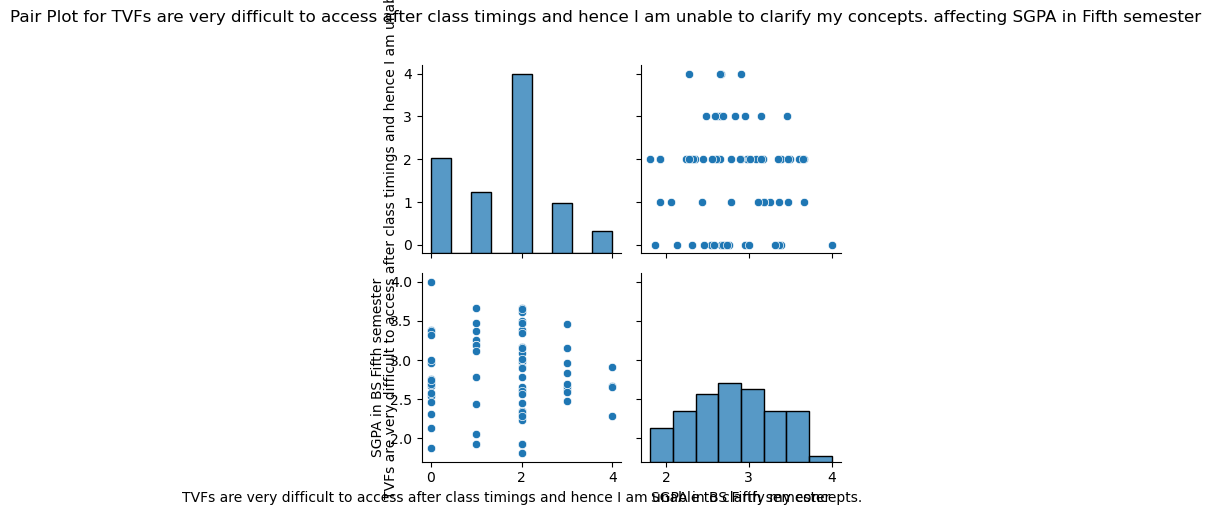

Feature 22


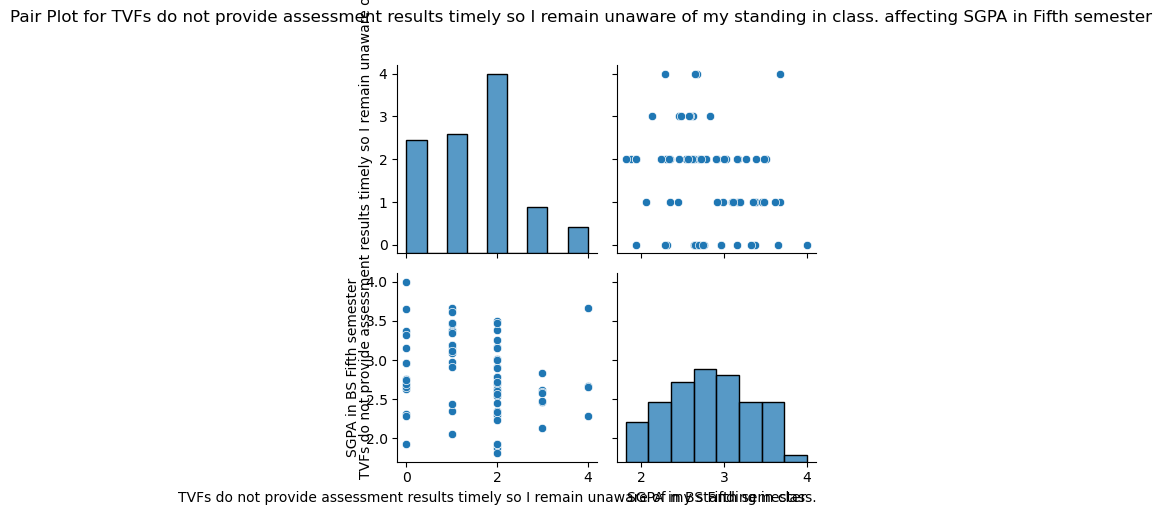

Feature 23


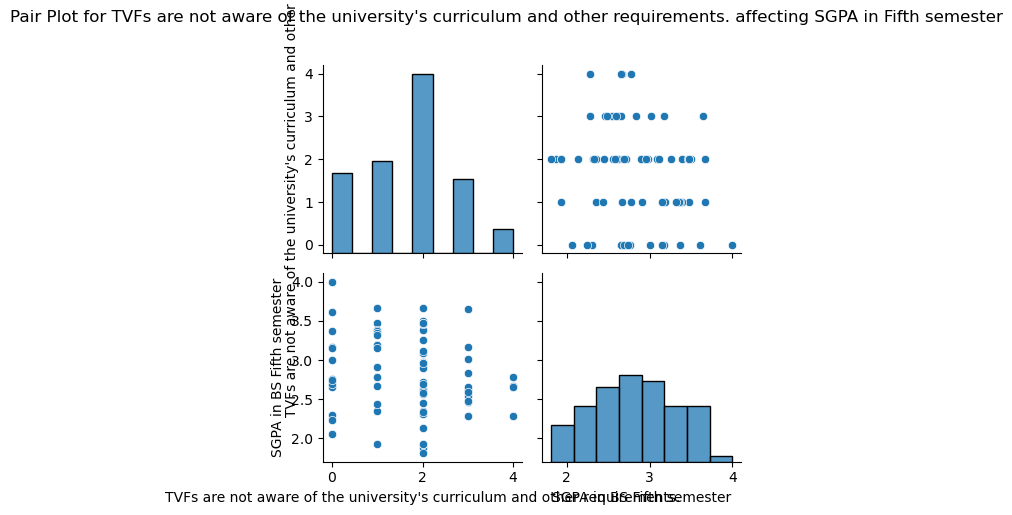

Feature 24


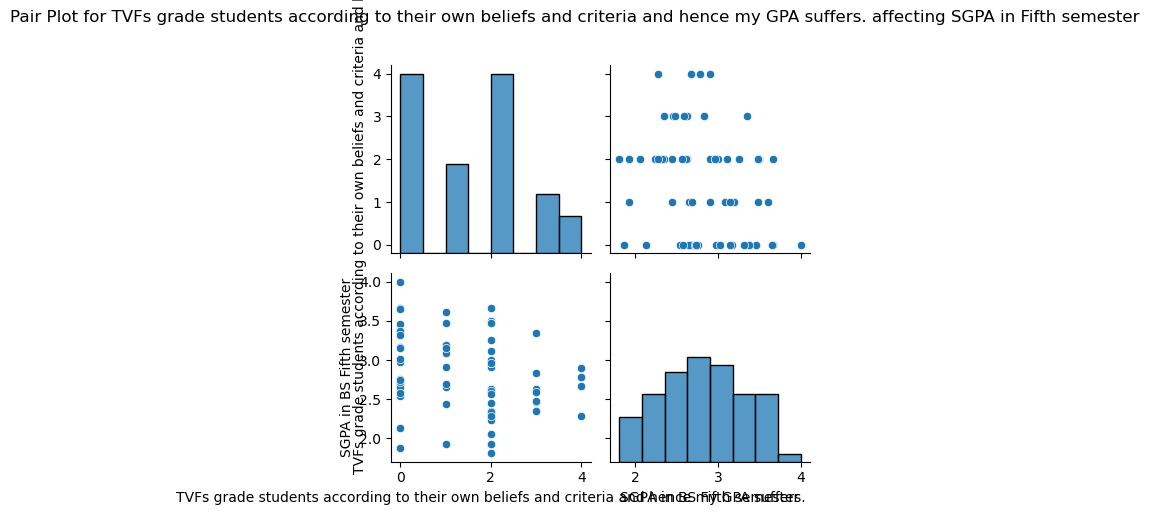

Feature 25


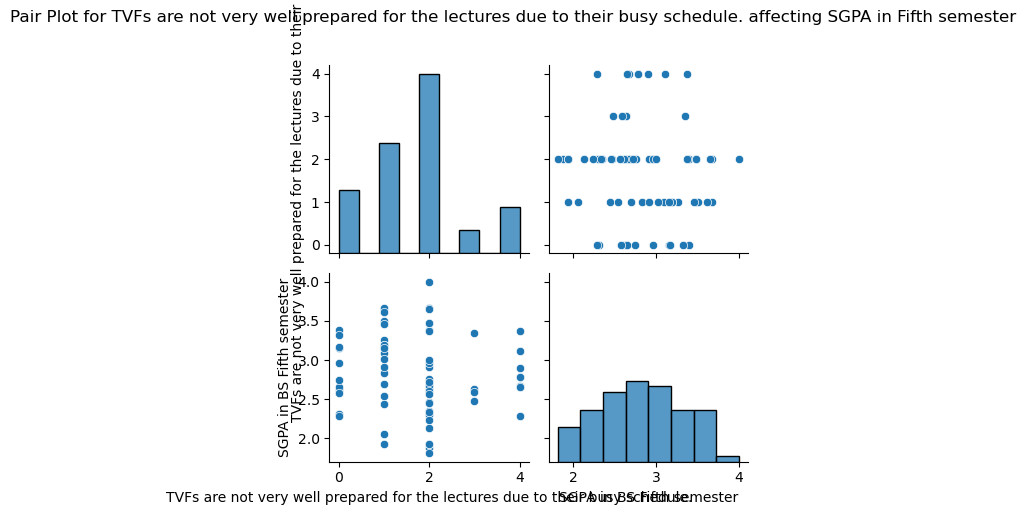

Feature 26


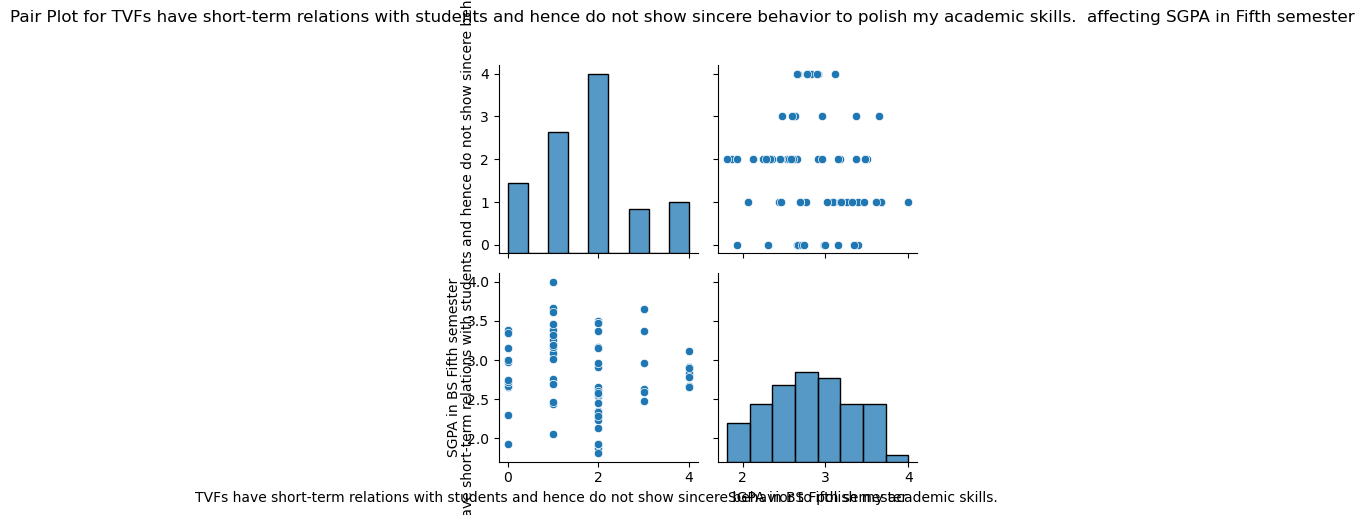

Feature 27


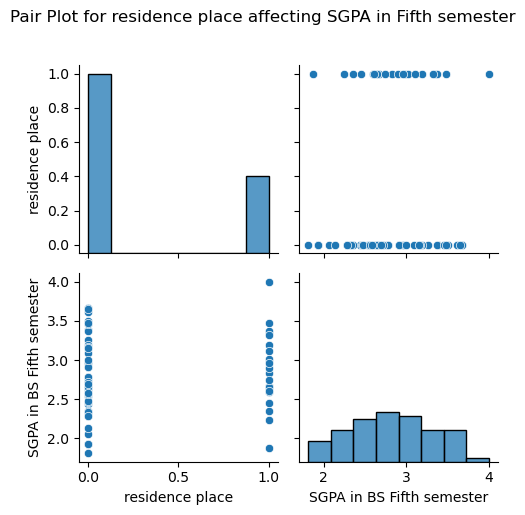

Feature 28


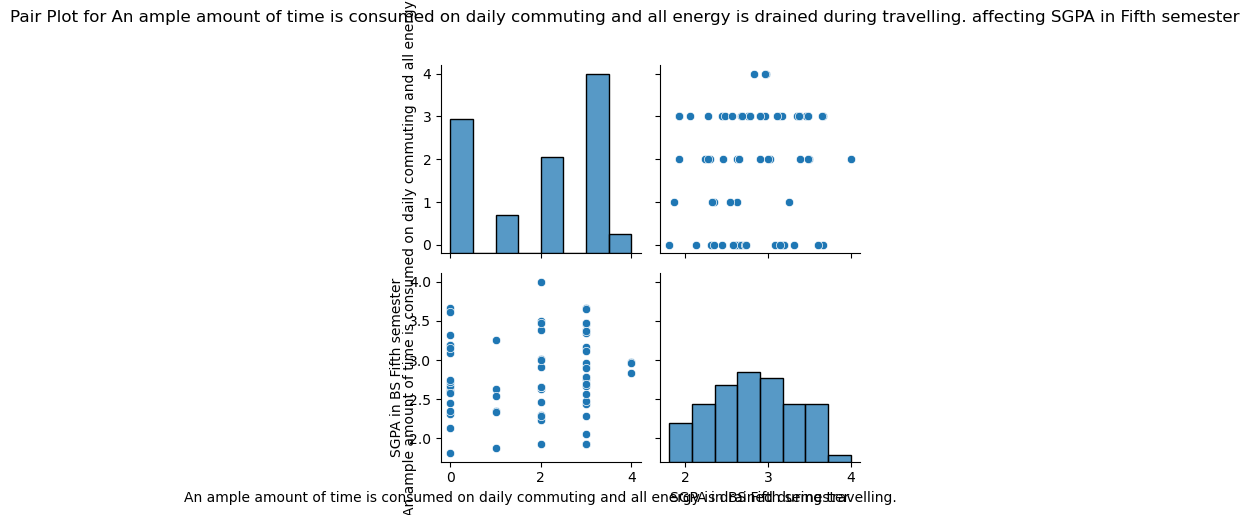

Feature 29


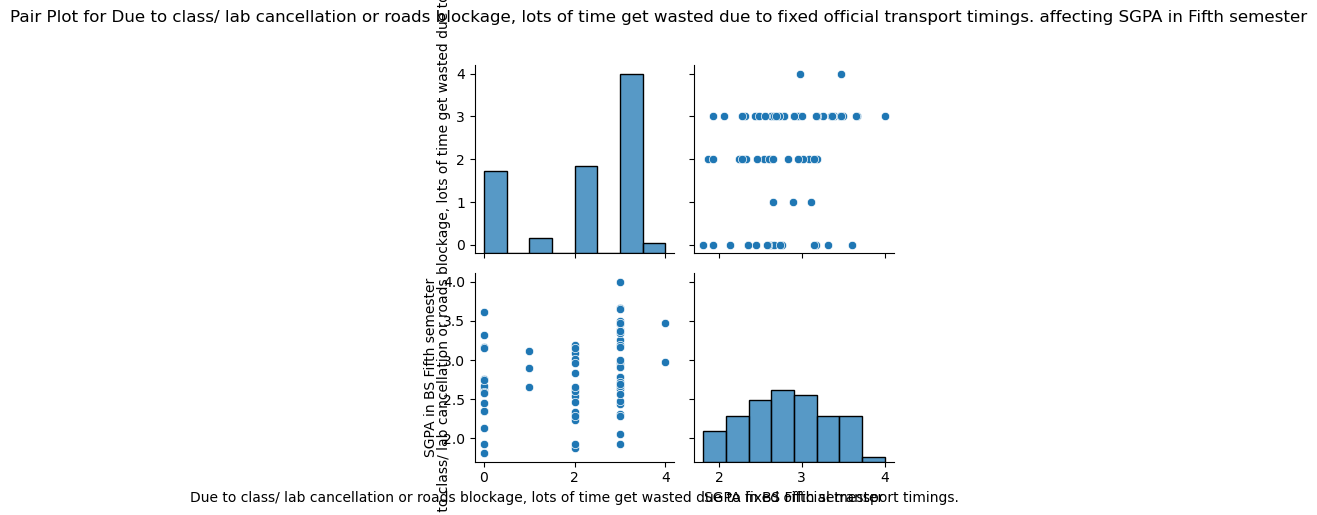

Feature 30


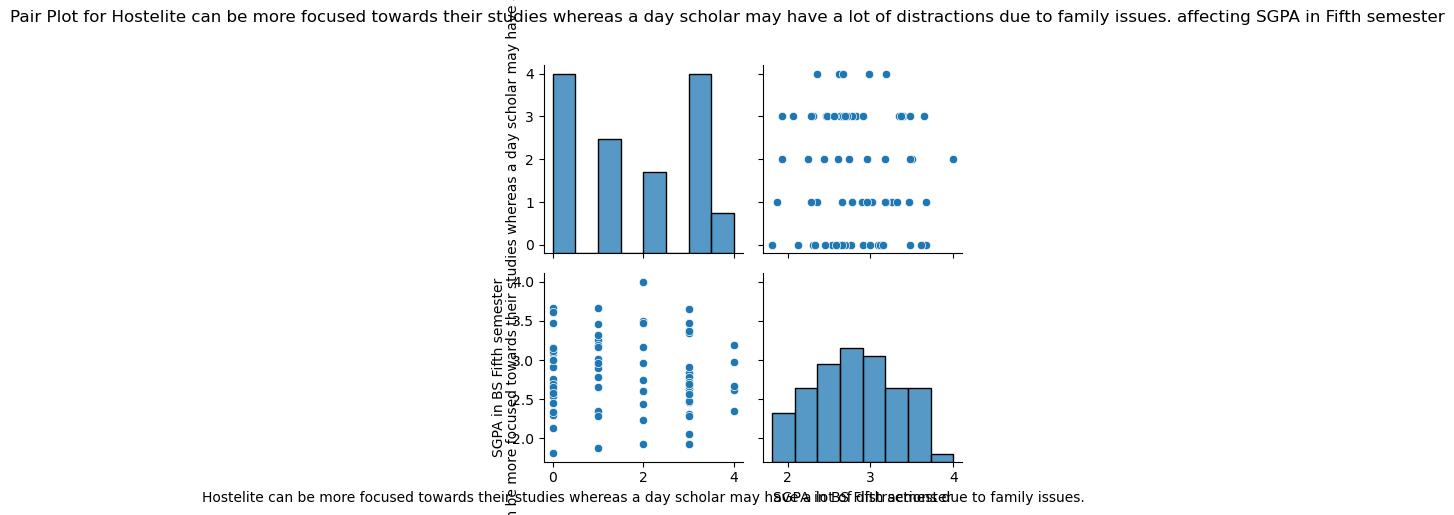

Feature 31


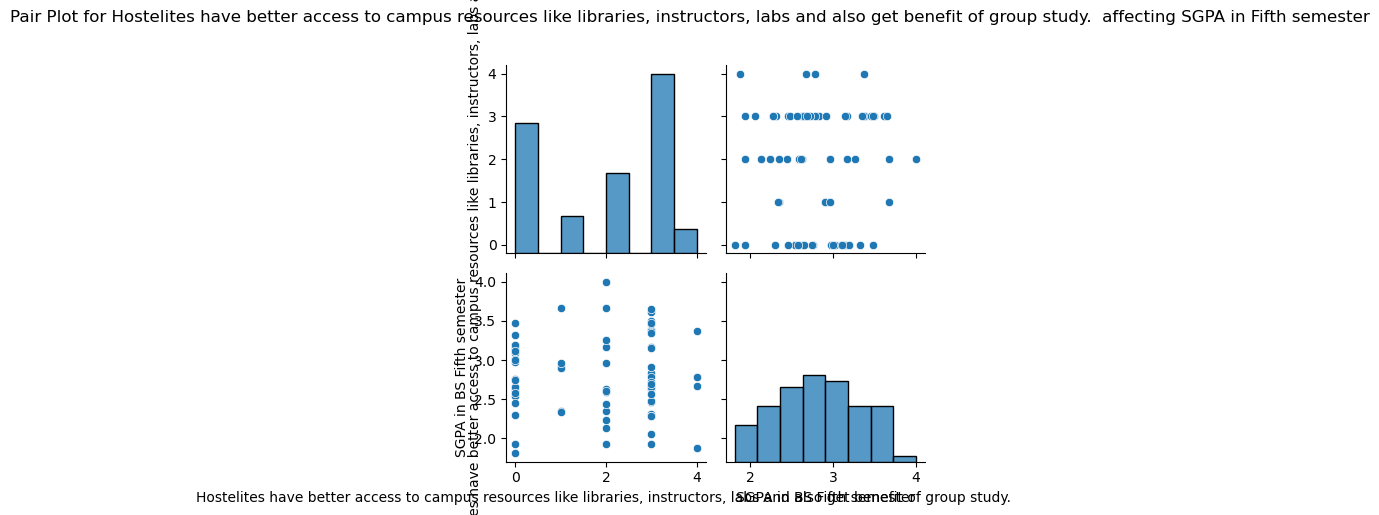

Feature 32


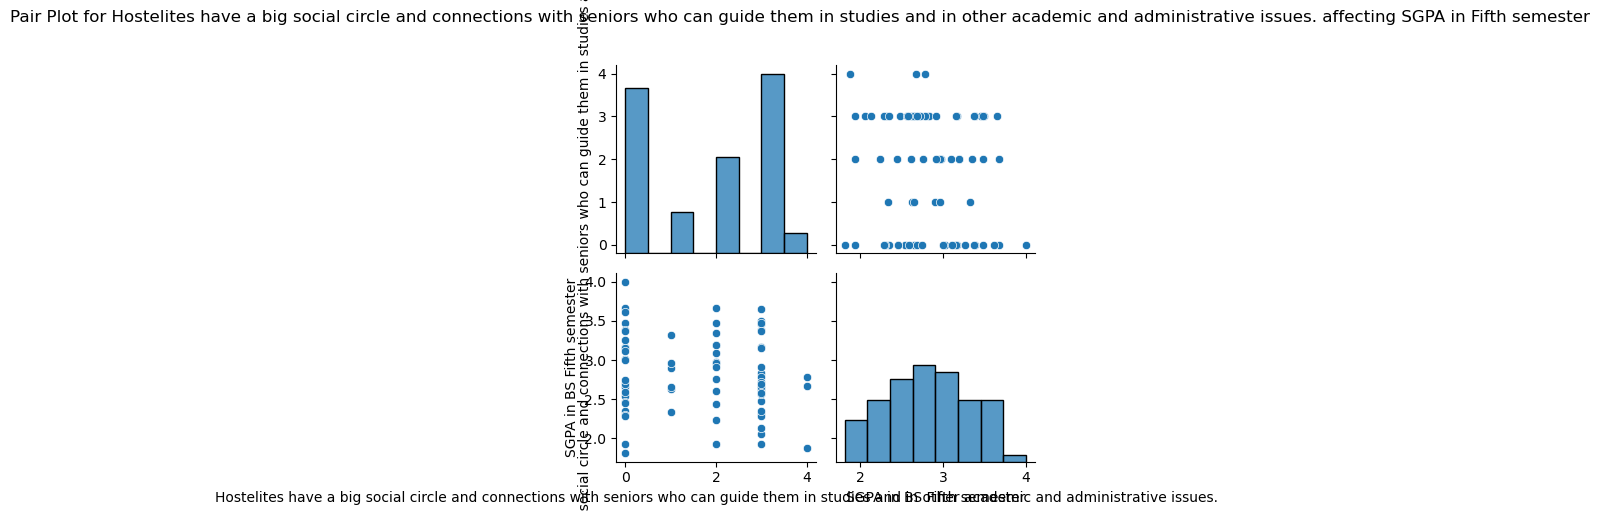

Feature 33


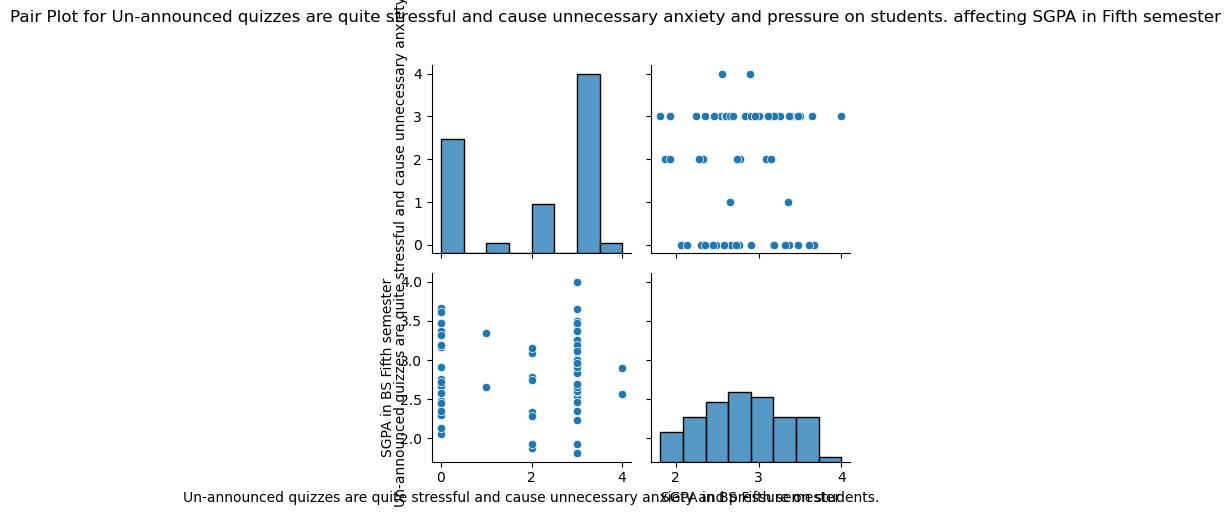

Feature 34


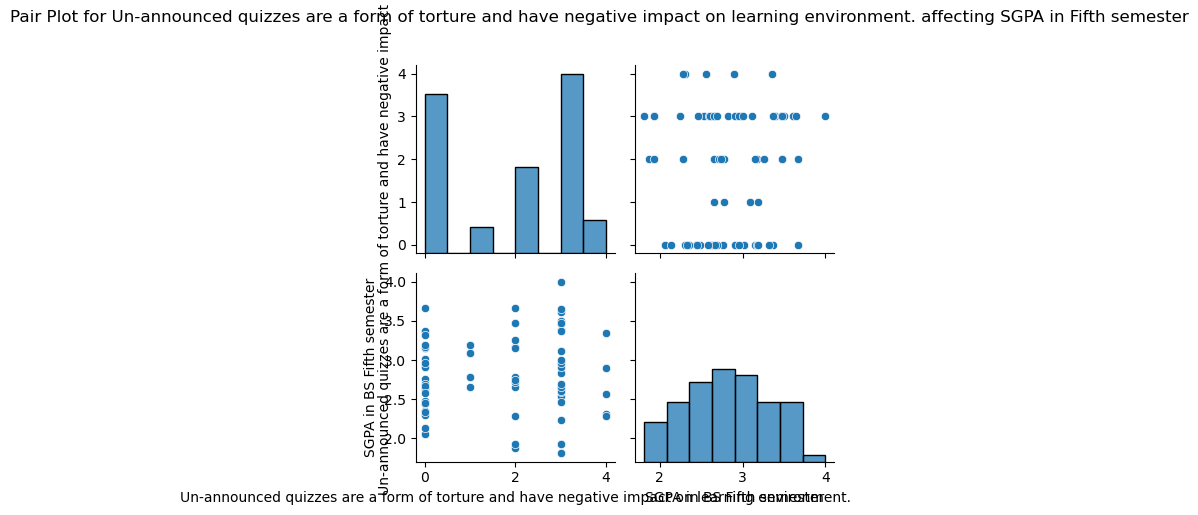

Feature 35


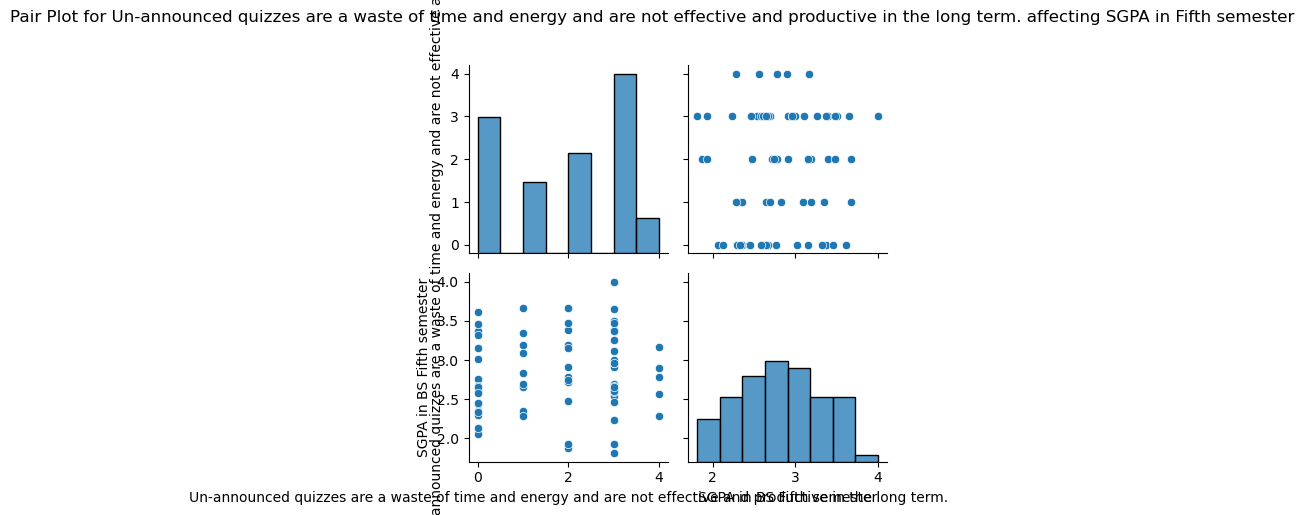

Feature 36


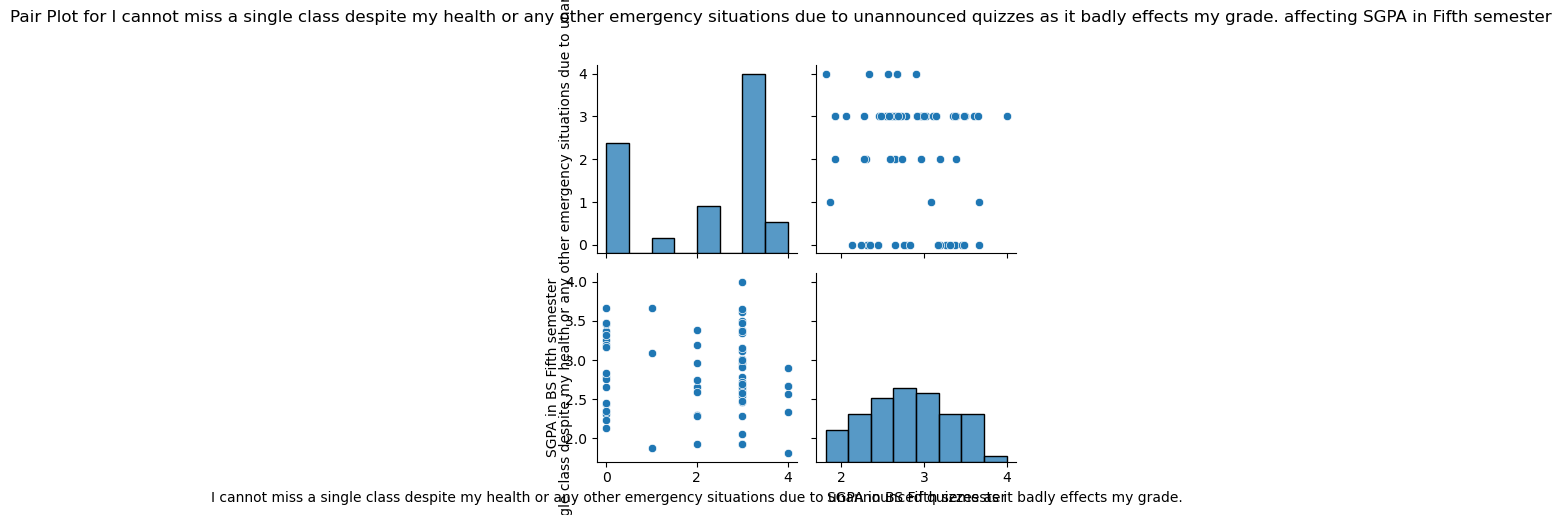

Feature 37


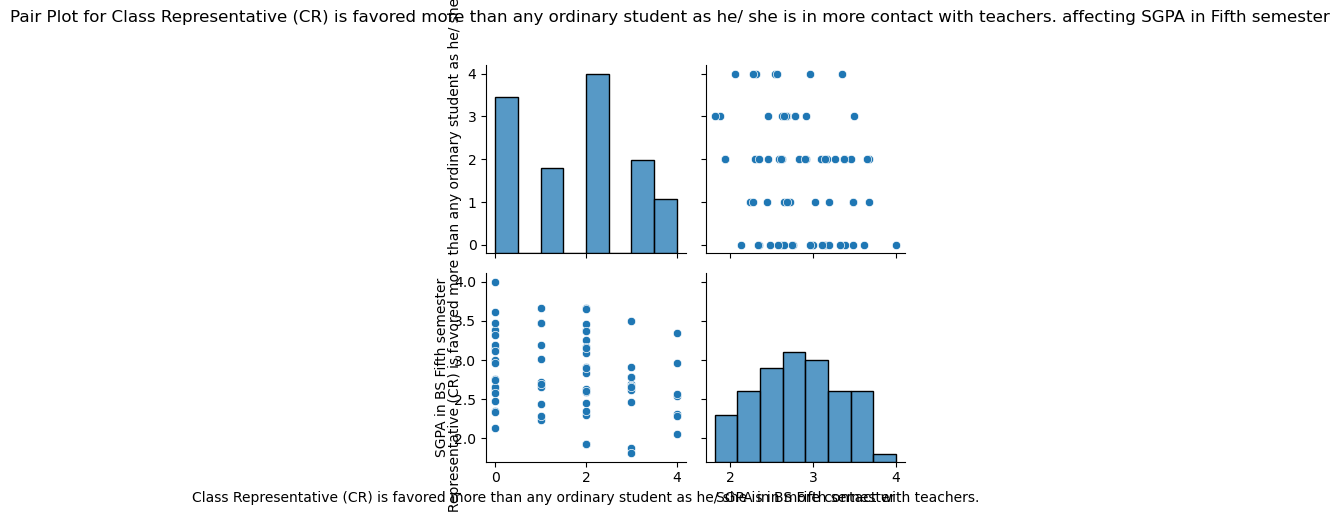

Feature 38


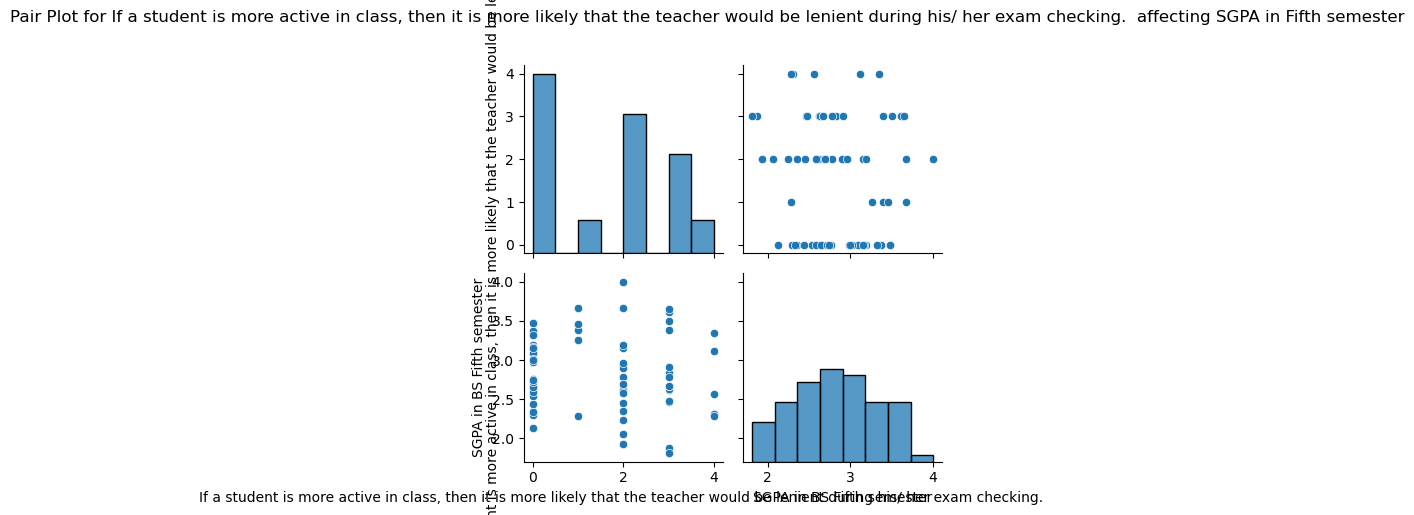

Feature 39


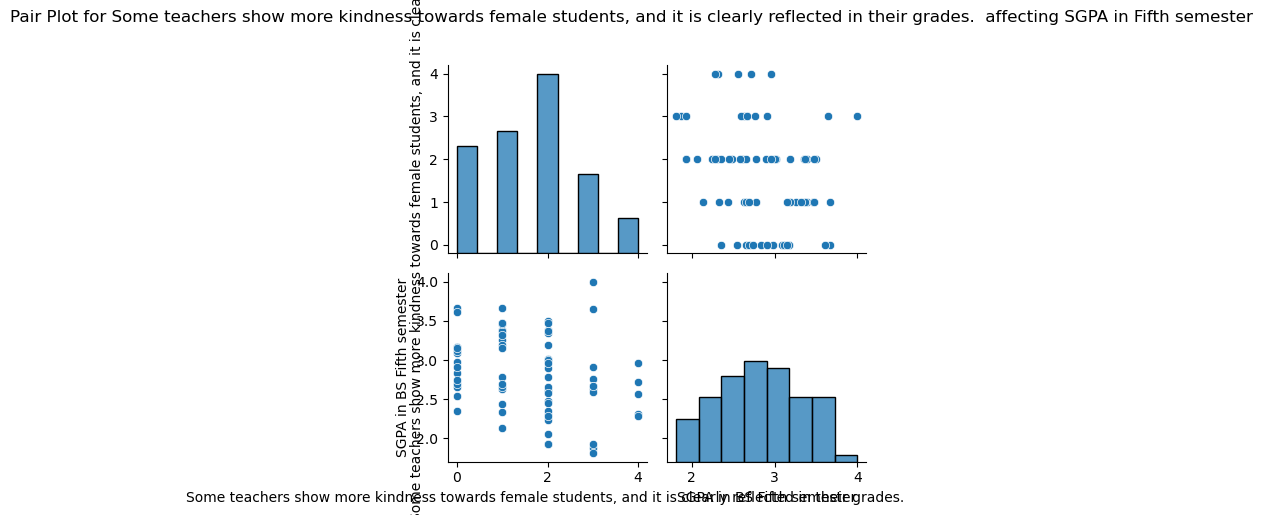

Feature 40


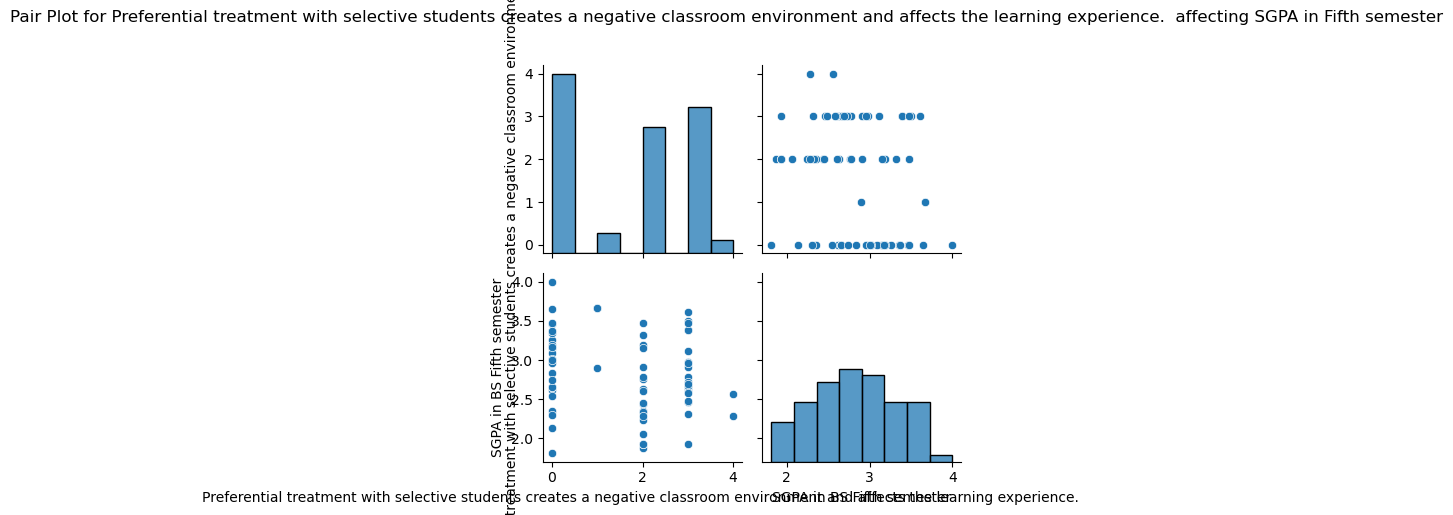

Feature 41


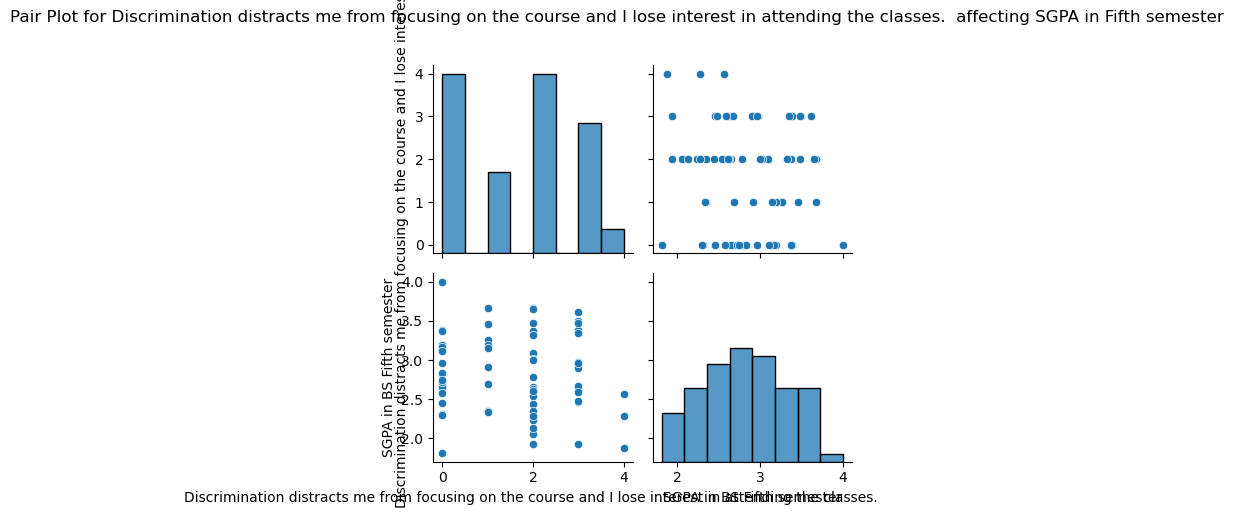

Feature 42


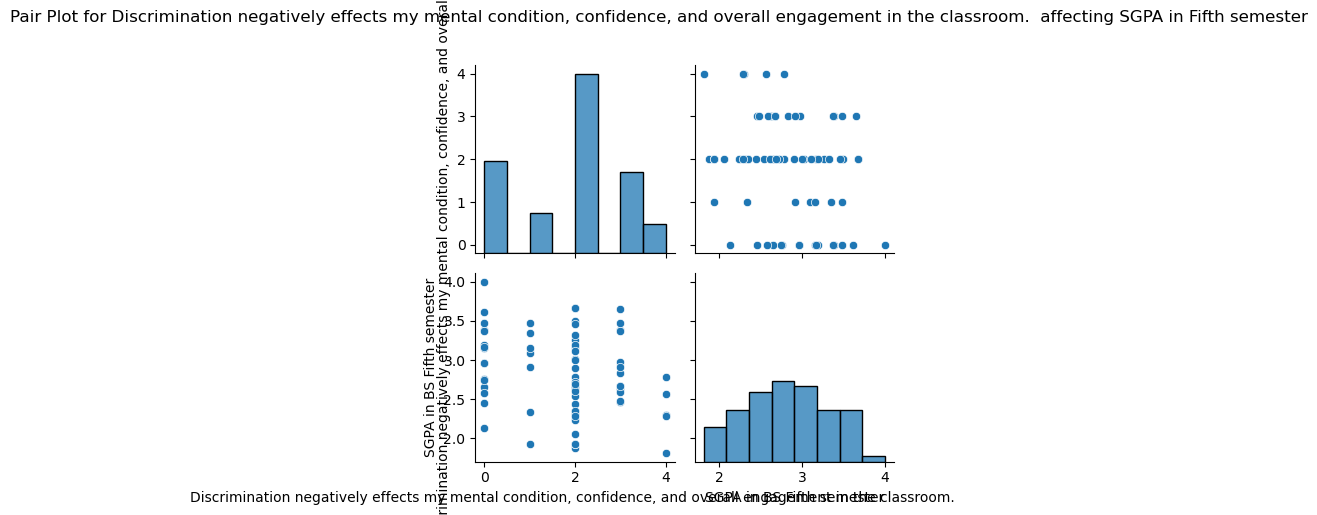

Feature 43


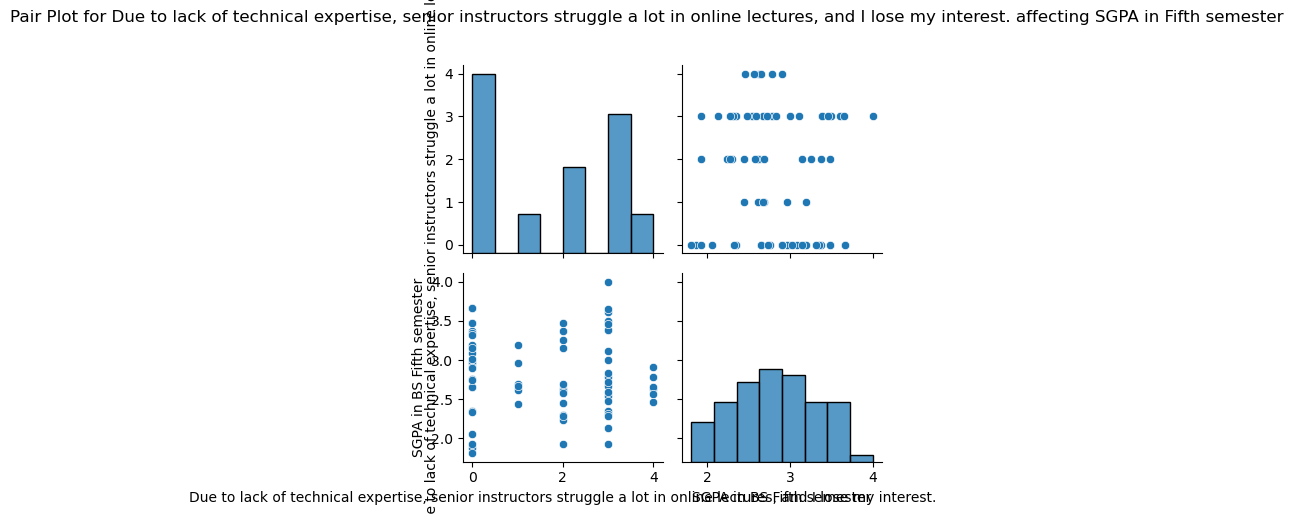

Feature 44


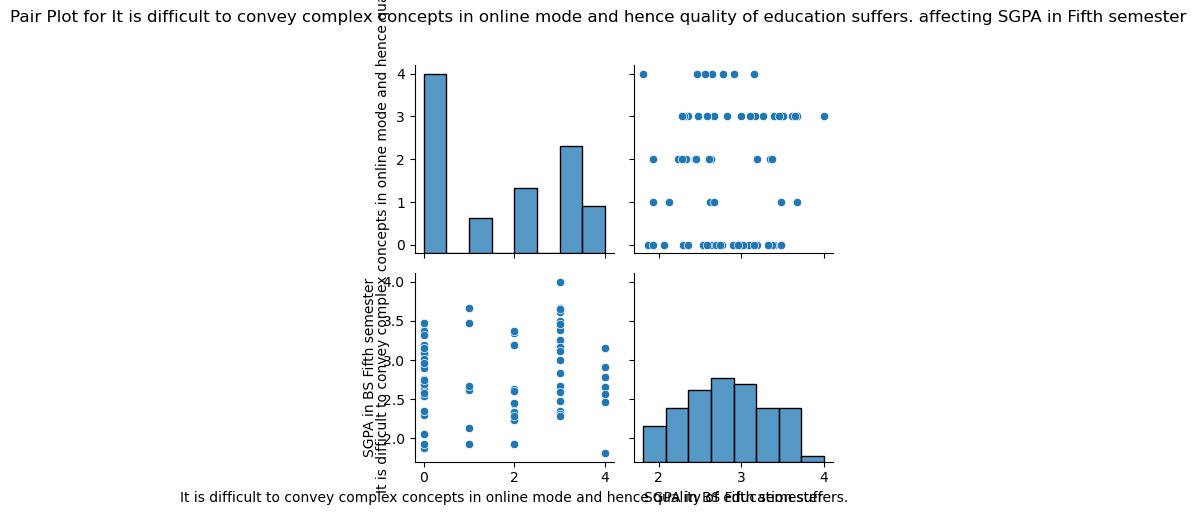

Feature 45


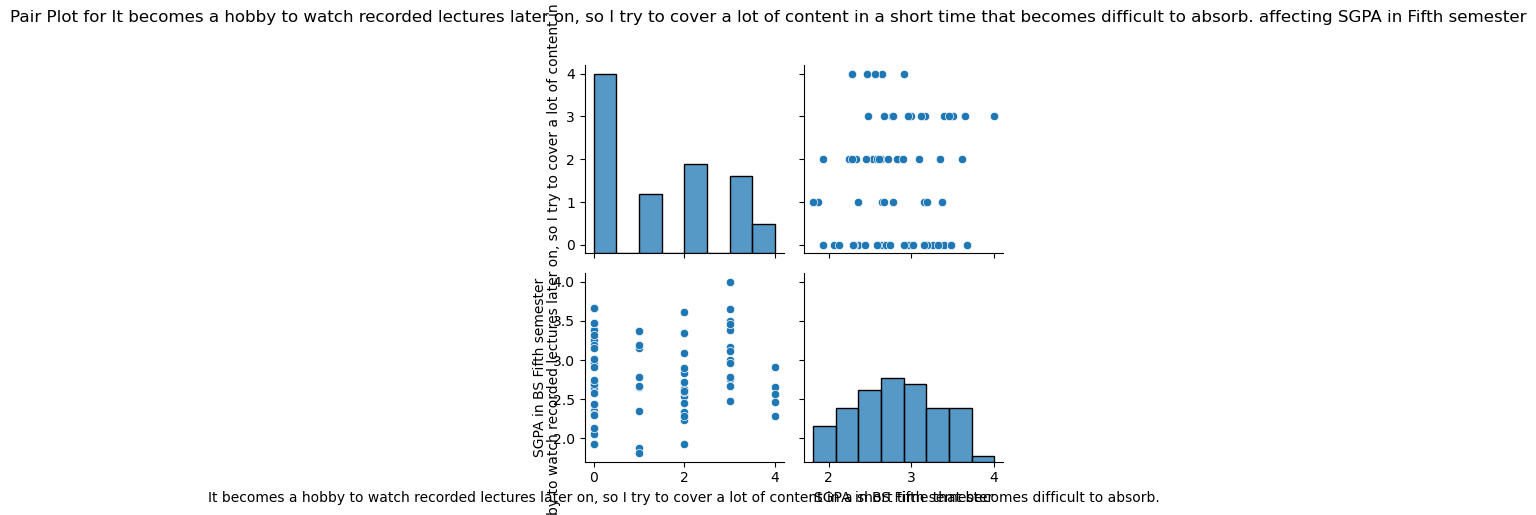

Feature 46


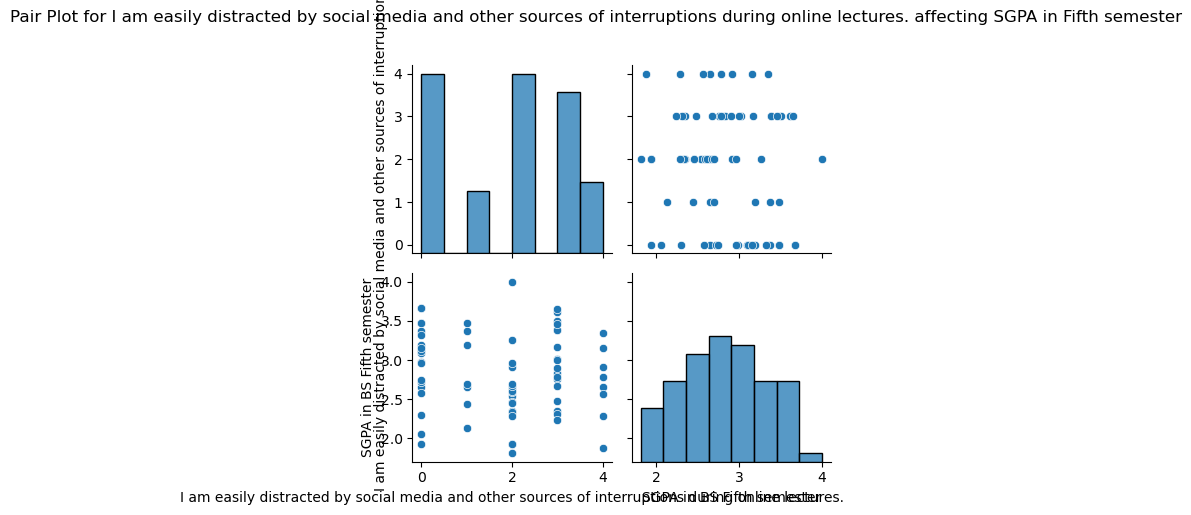

Feature 47


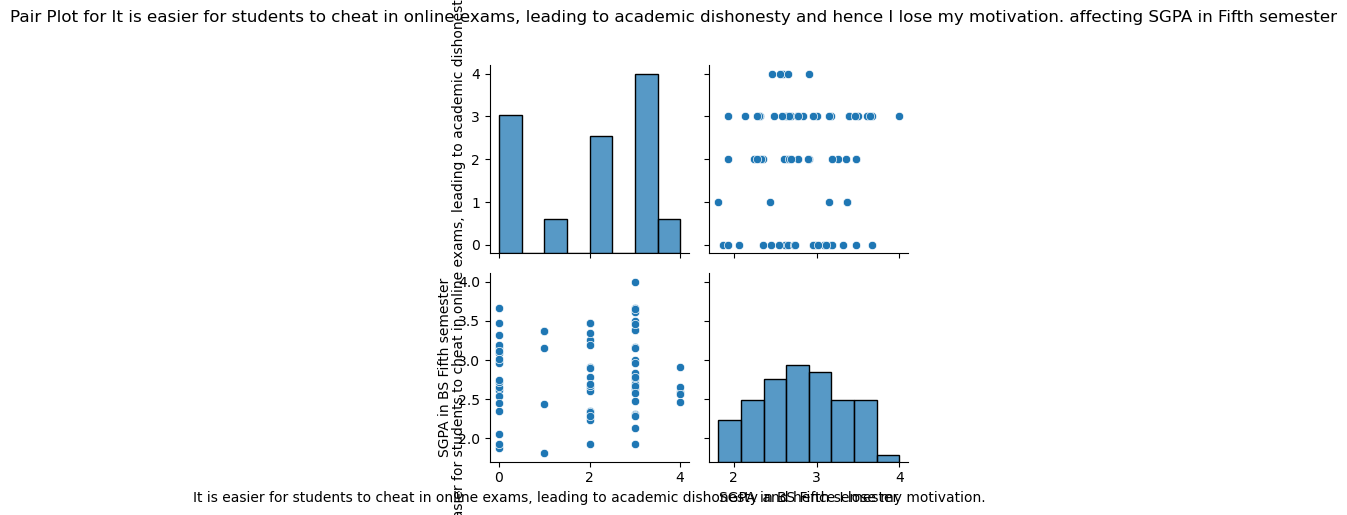

Feature 48


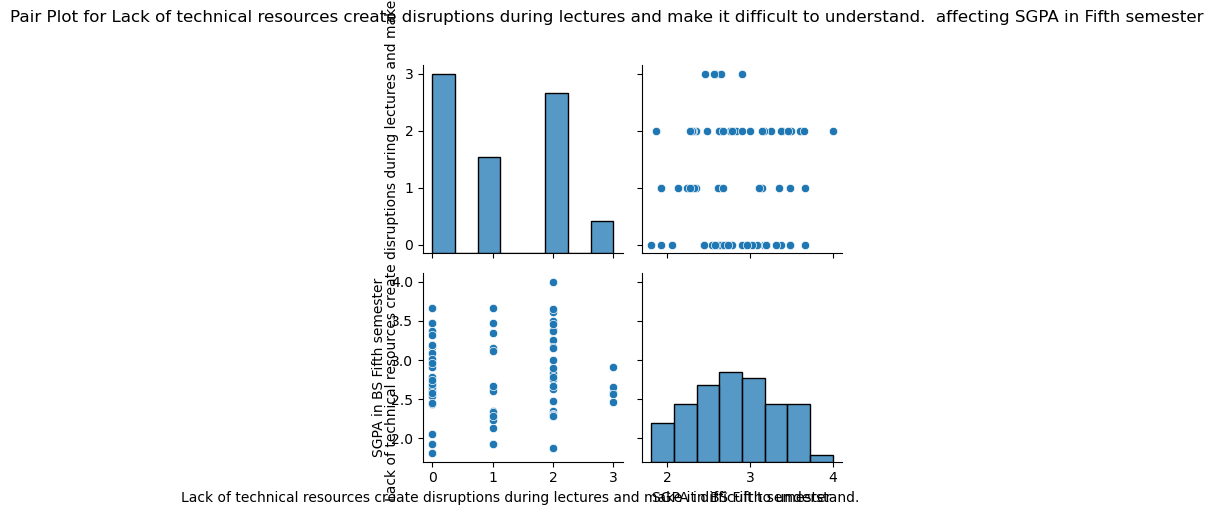

Feature 49


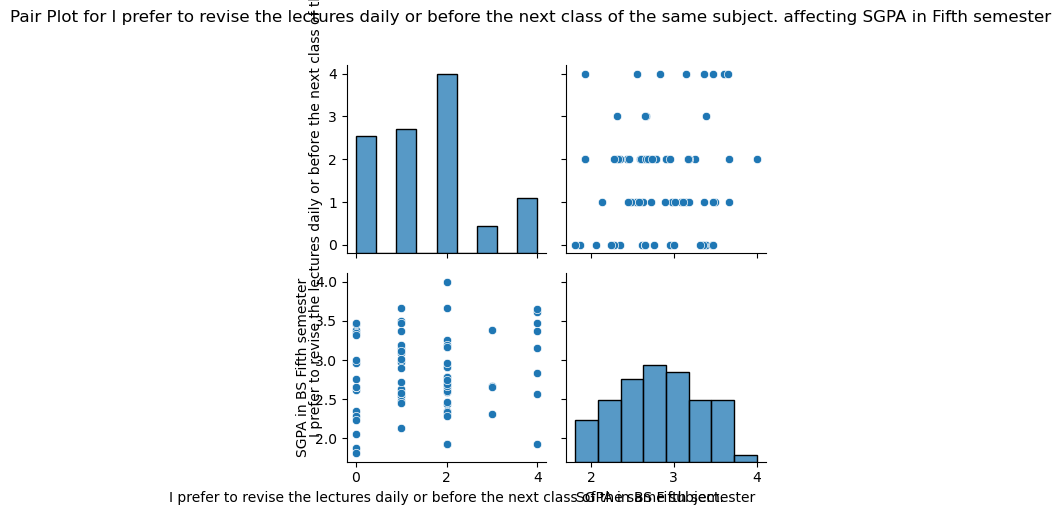

Feature 50


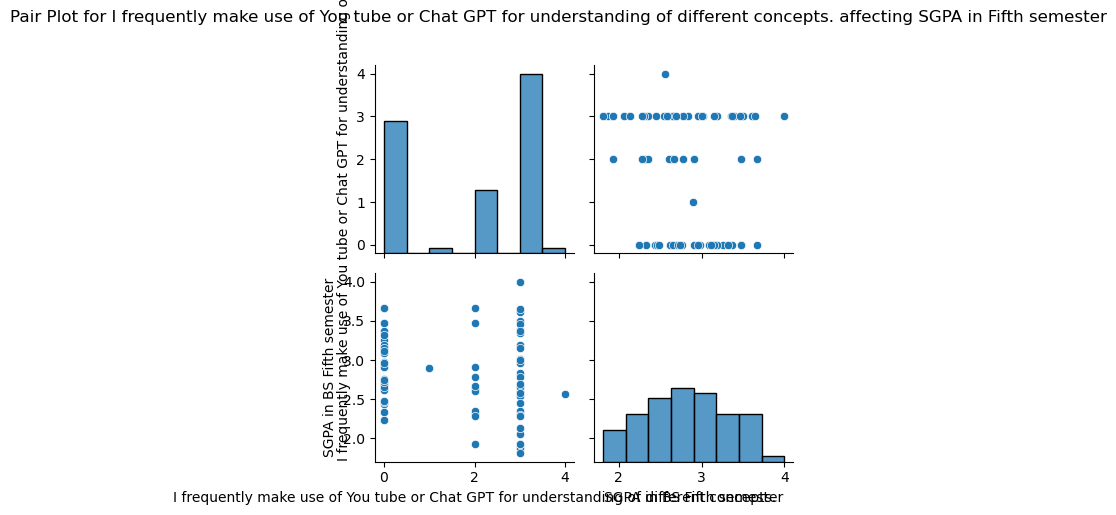

Feature 51


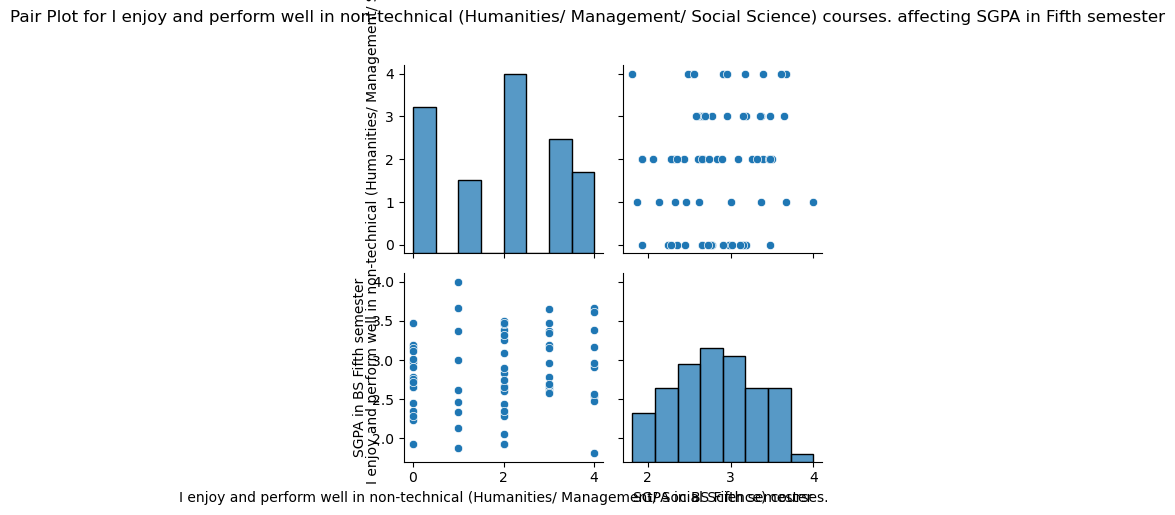

Feature 52


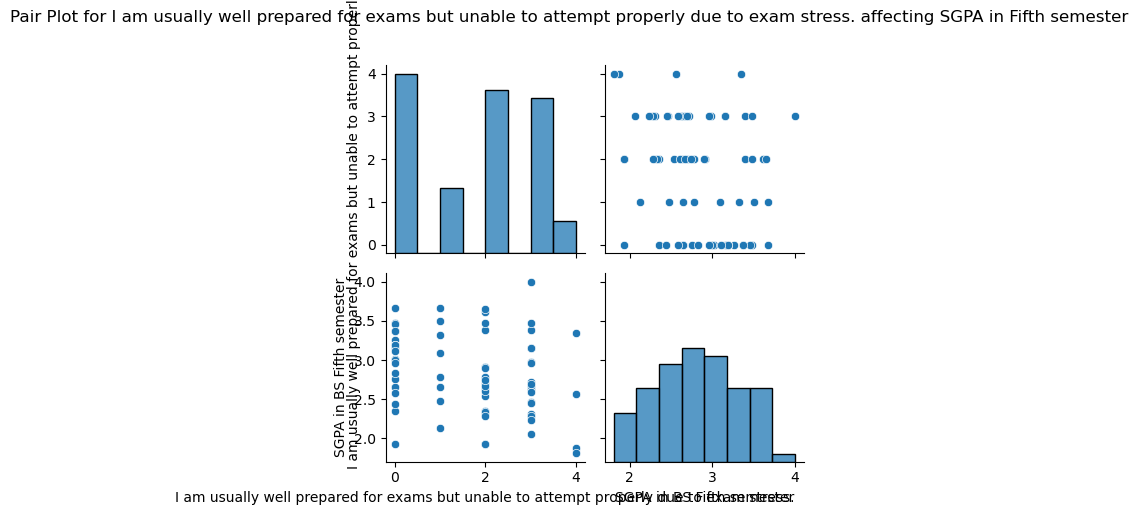

Feature 53


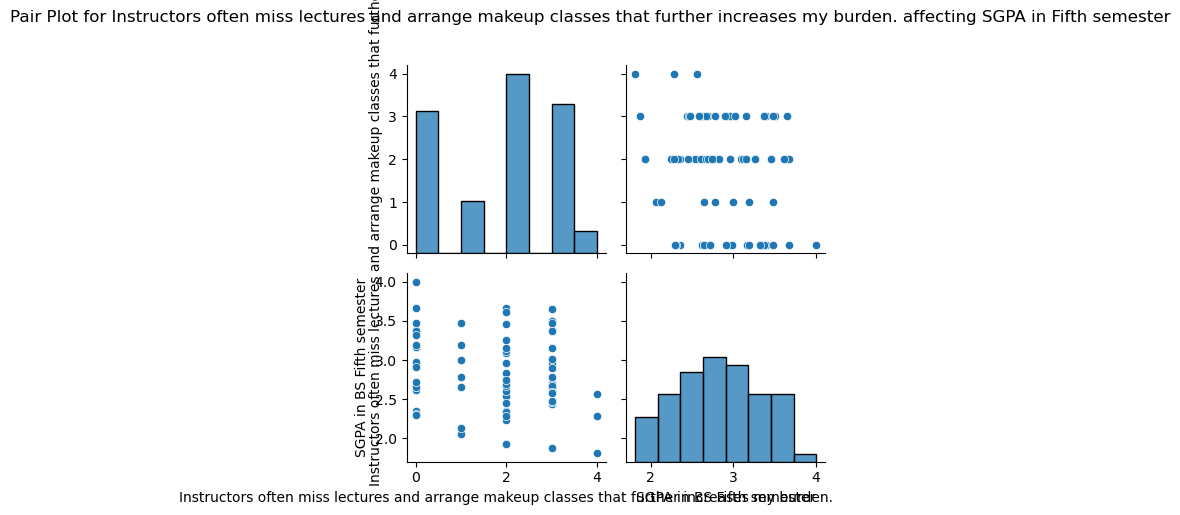

Feature 54


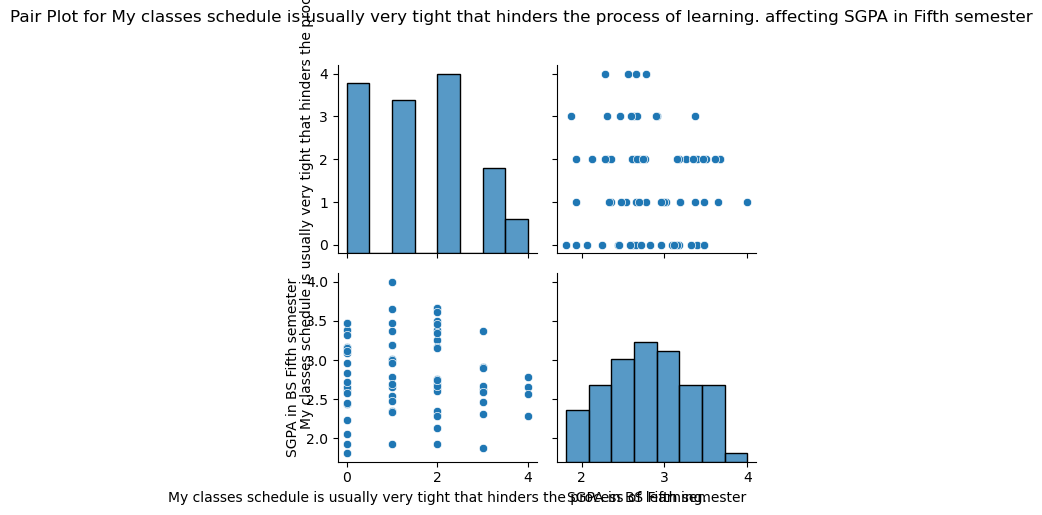

Feature 55


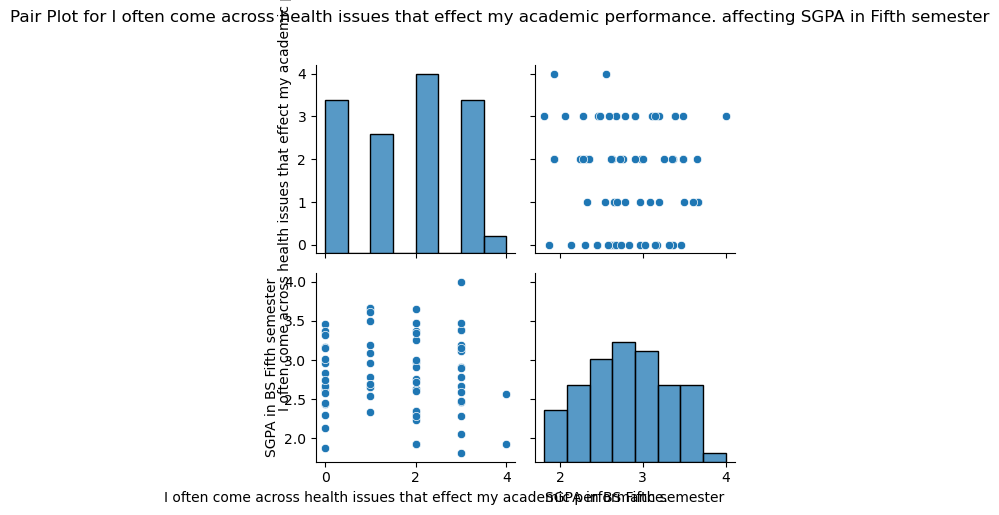

Feature 56


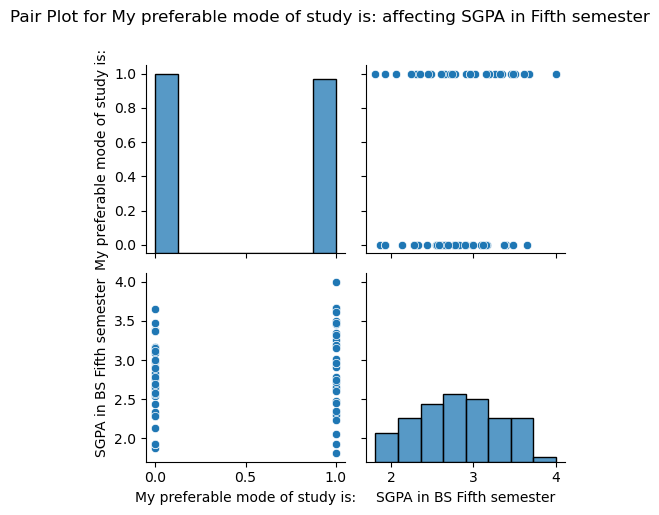

Feature 57


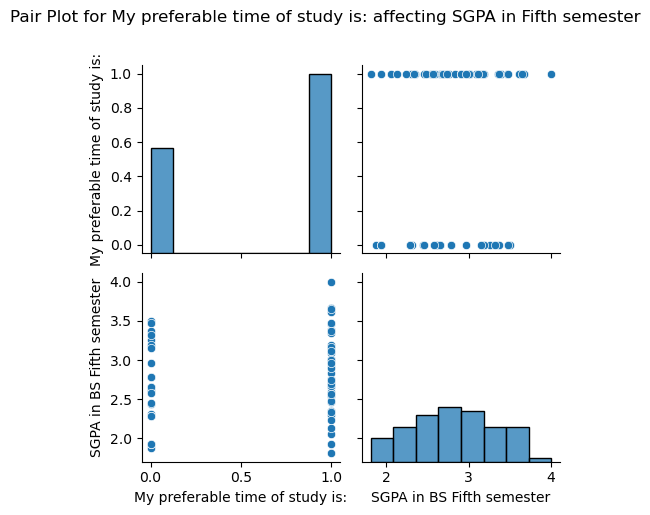

Feature 58


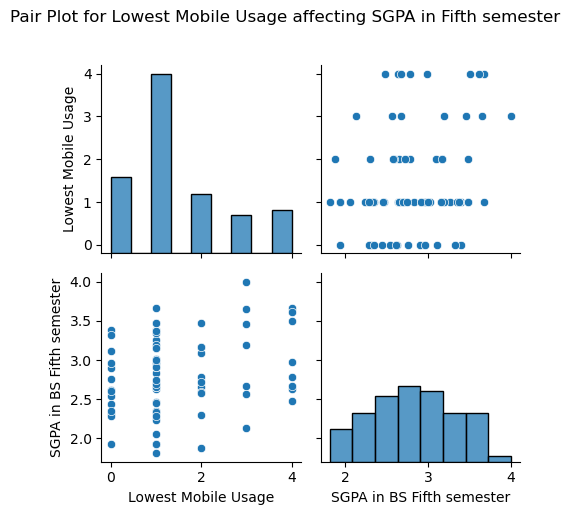

Feature 59


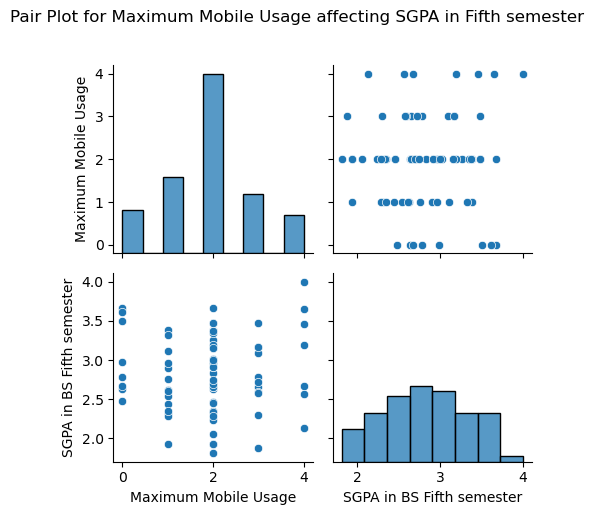

Feature 0


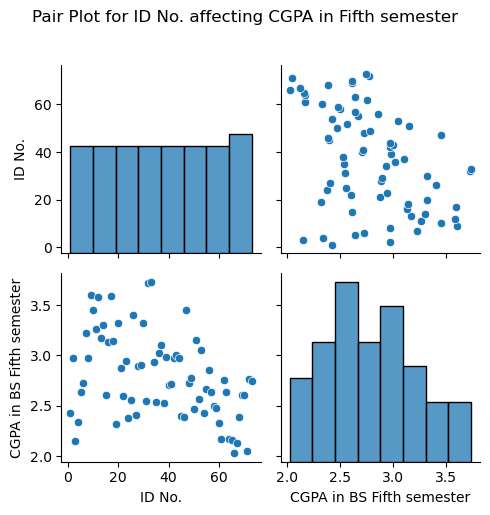

Feature 1


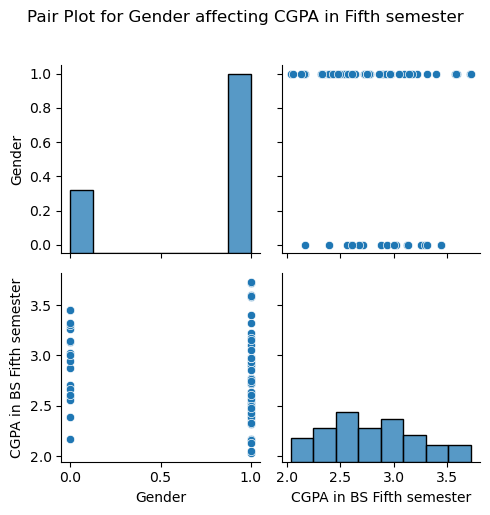

Feature 2


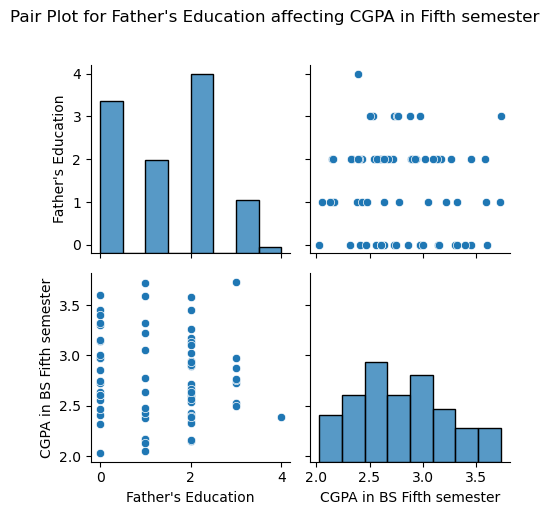

Feature 3


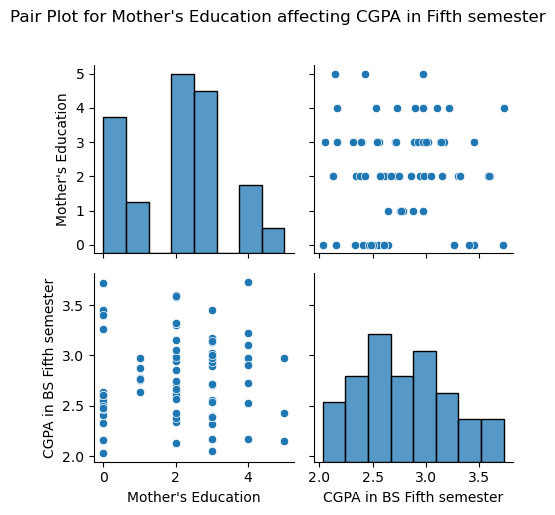

Feature 4


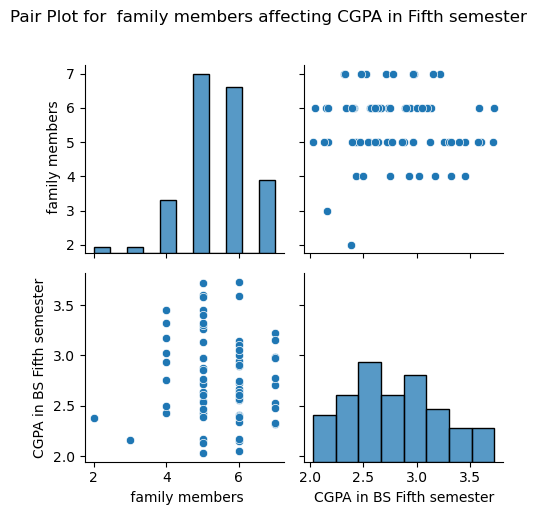

Feature 5


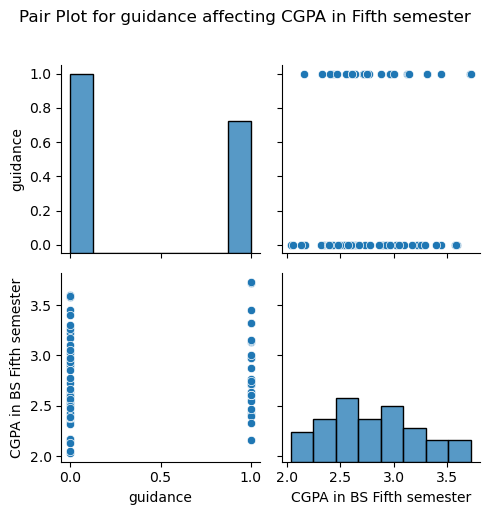

Feature 6


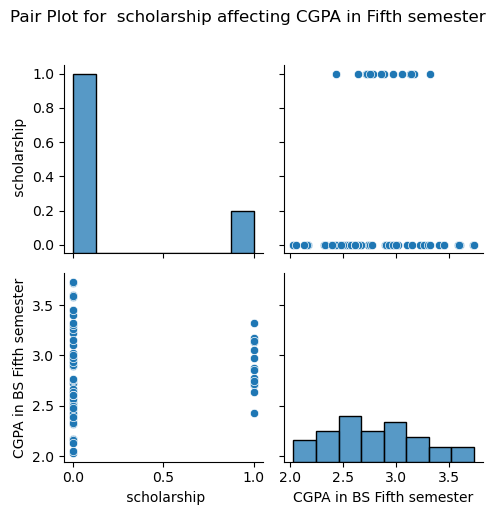

Feature 7


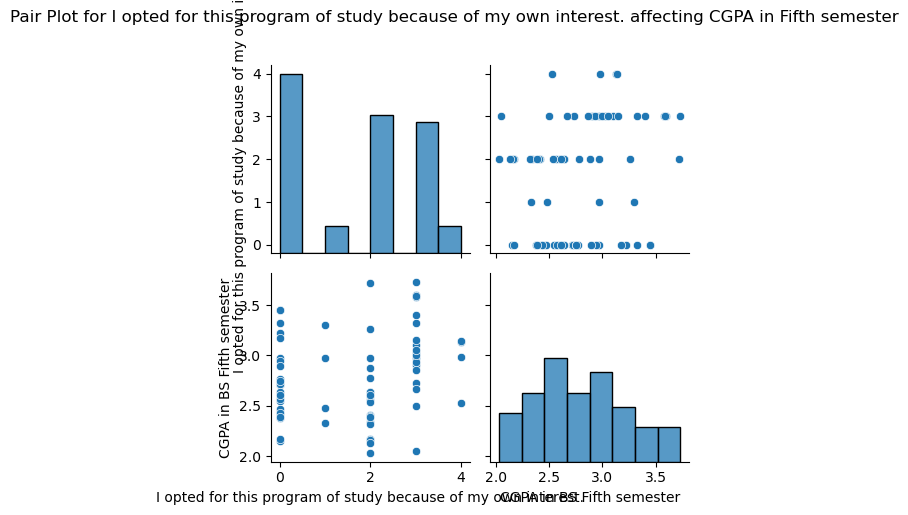

Feature 8


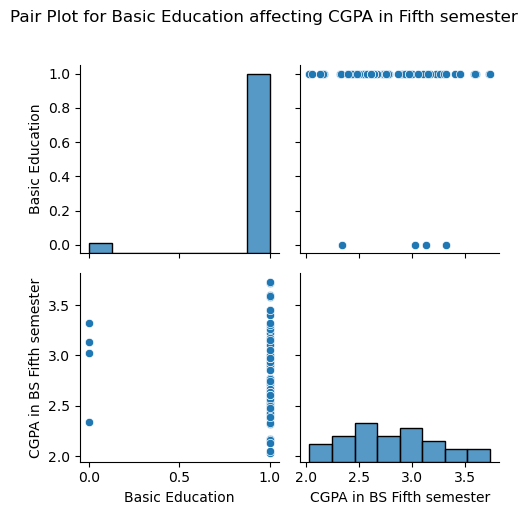

Feature 9


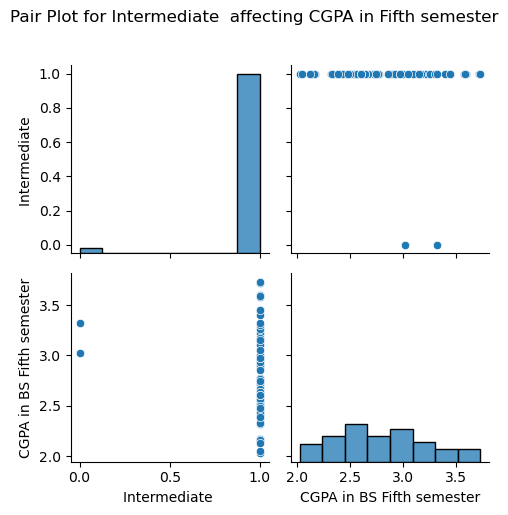

Feature 10


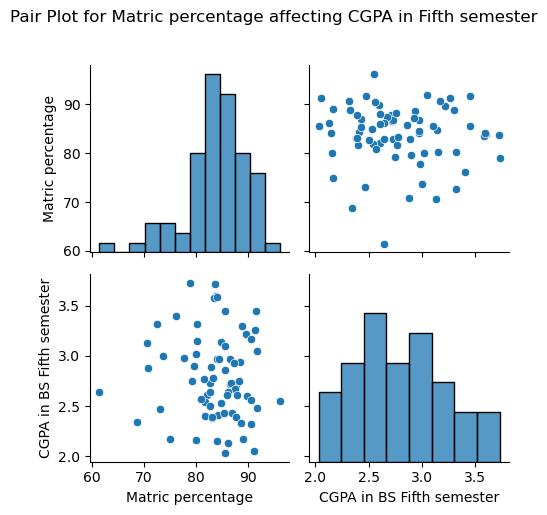

Feature 11


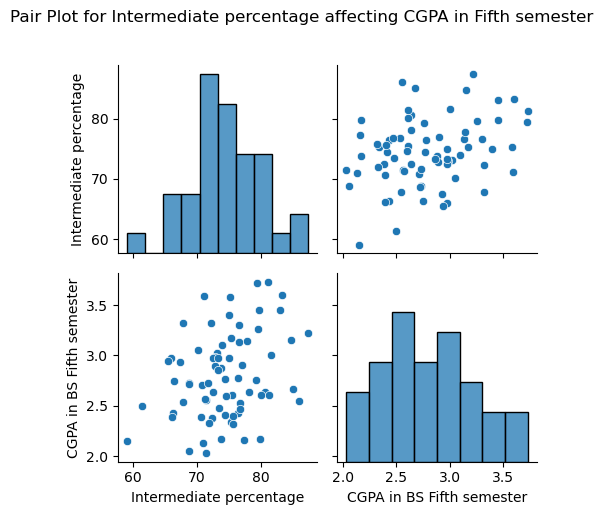

Feature 12


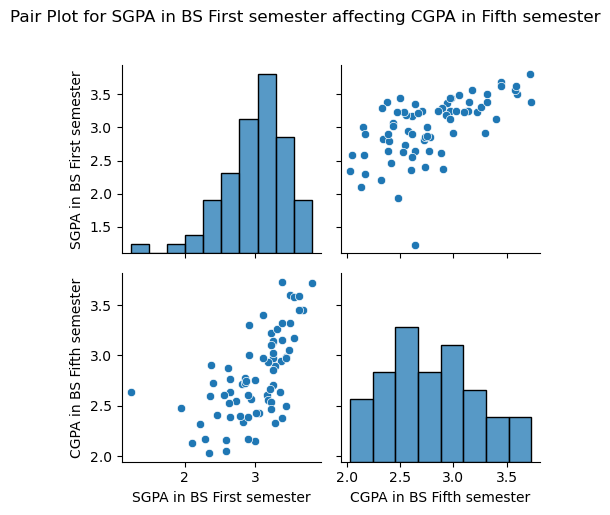

Feature 13


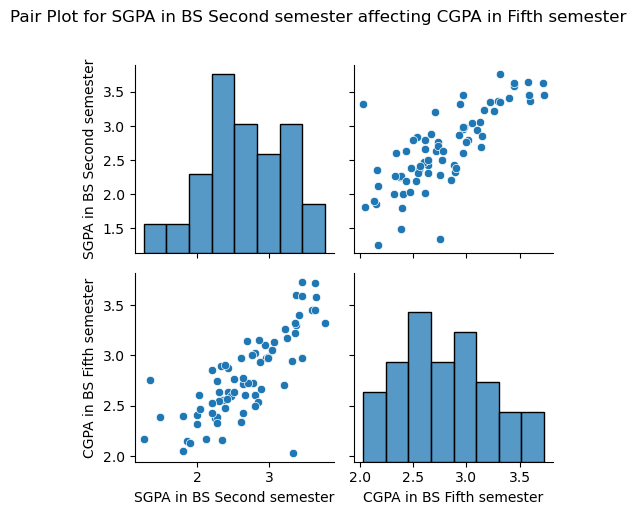

Feature 14


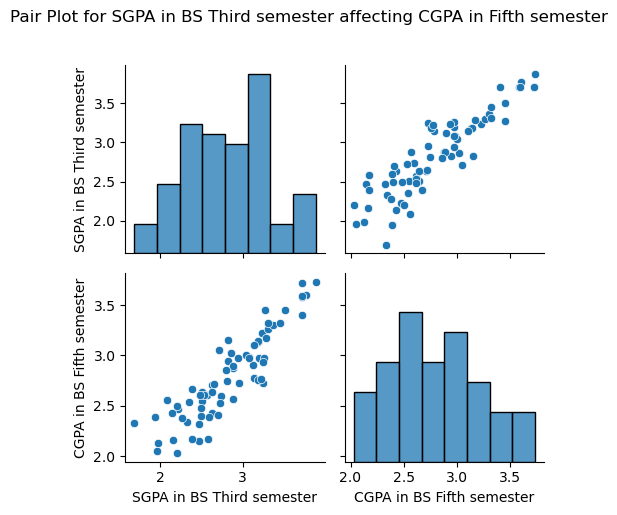

Feature 15


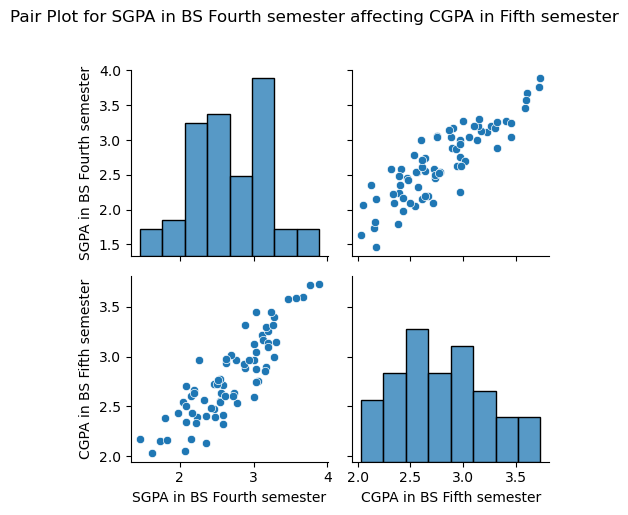

Feature 16


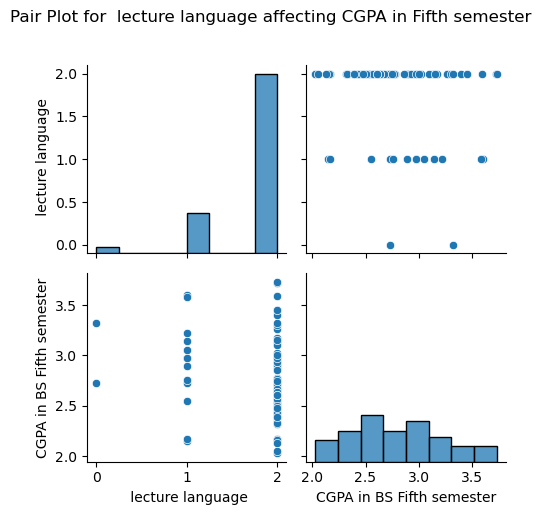

Feature 17


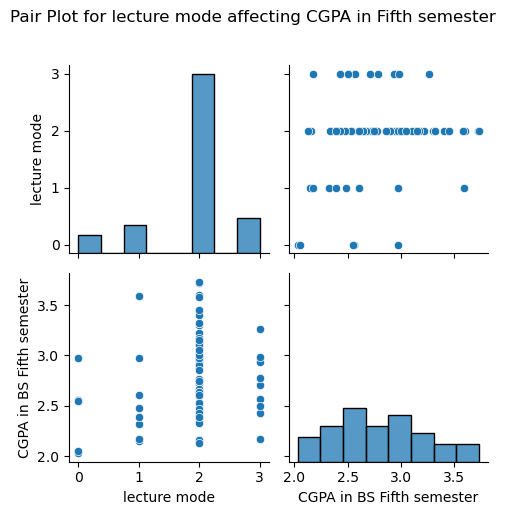

Feature 18


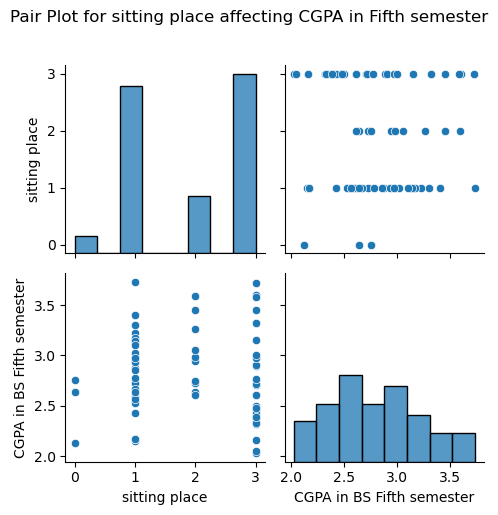

Feature 19


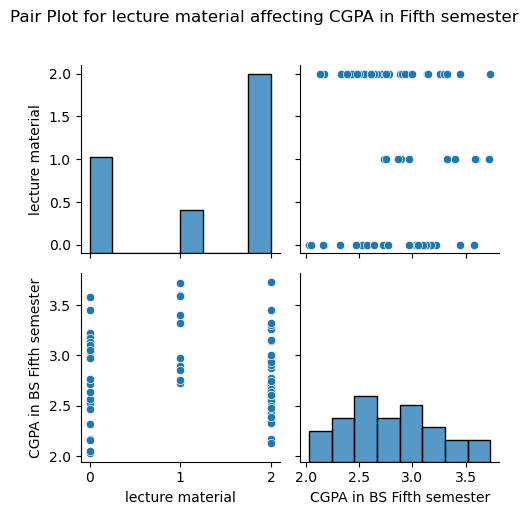

Feature 20


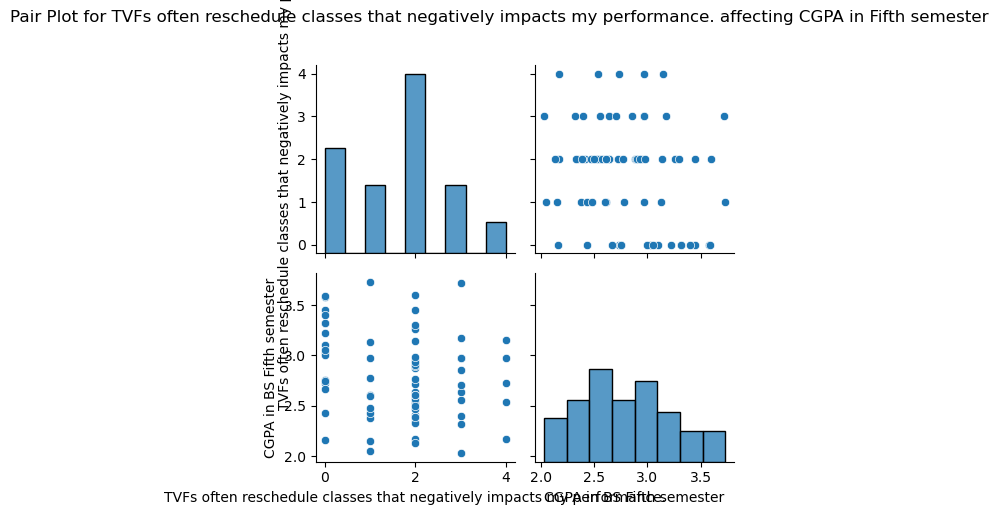

Feature 21


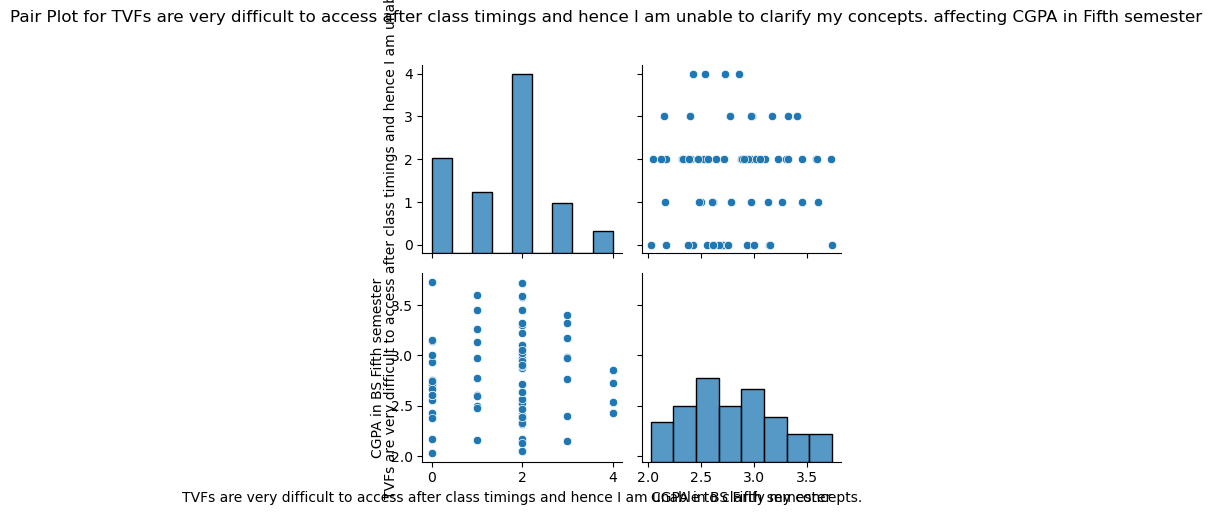

Feature 22


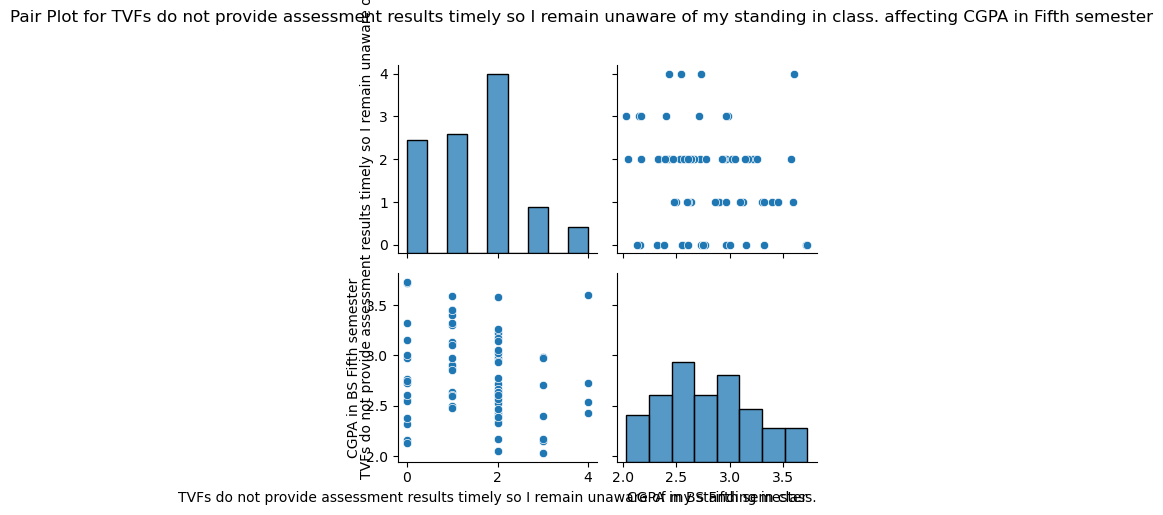

Feature 23


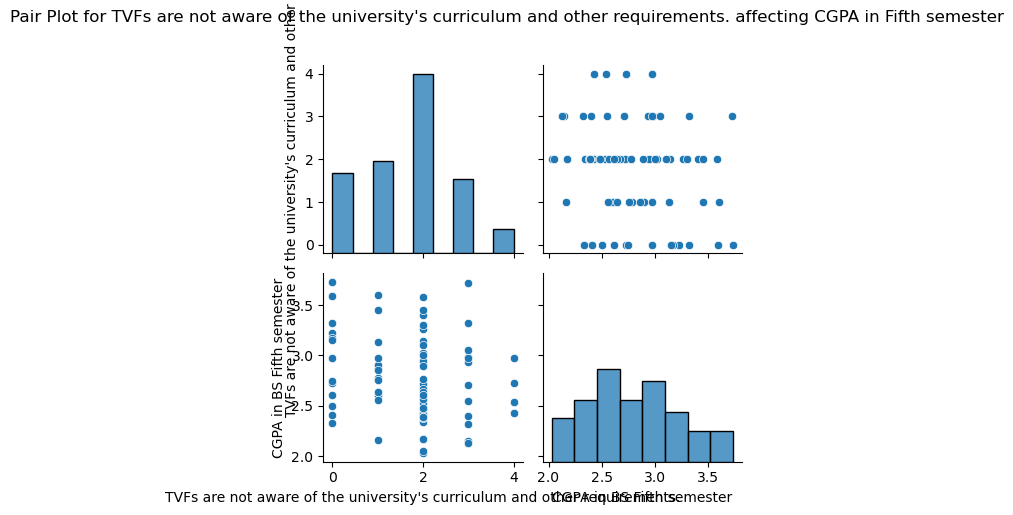

Feature 24


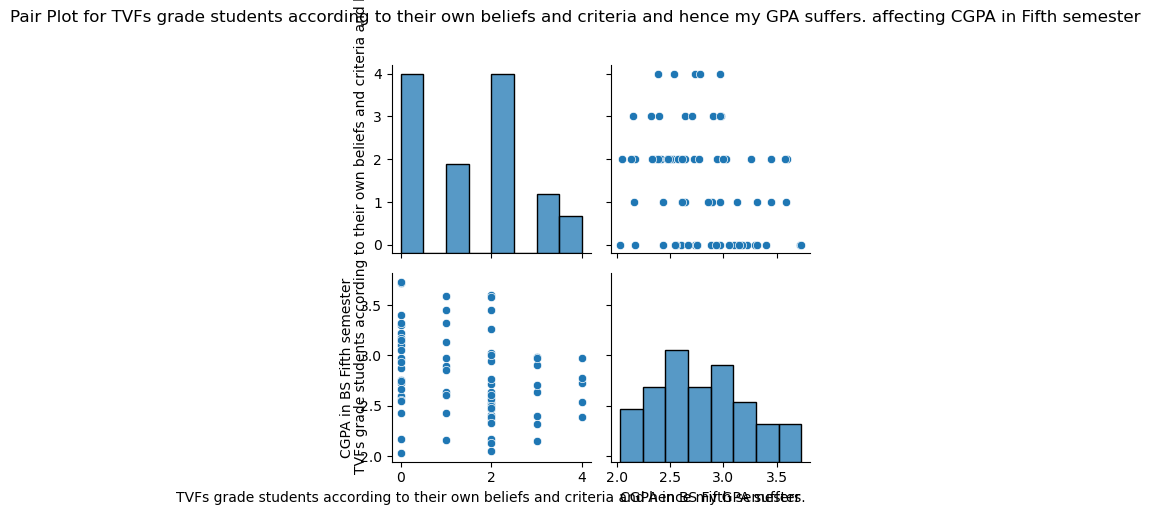

Feature 25


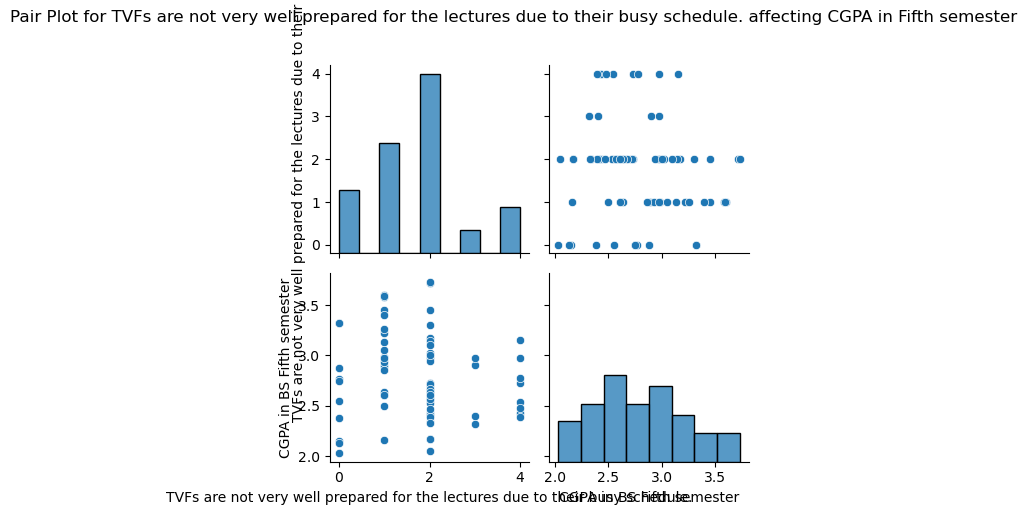

Feature 26


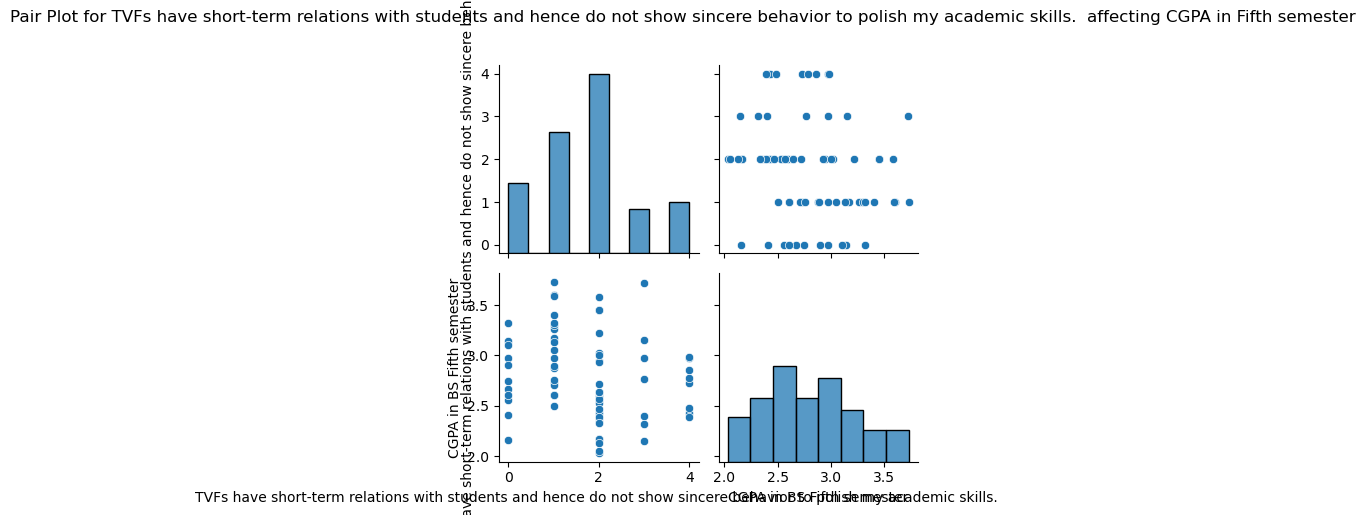

Feature 27


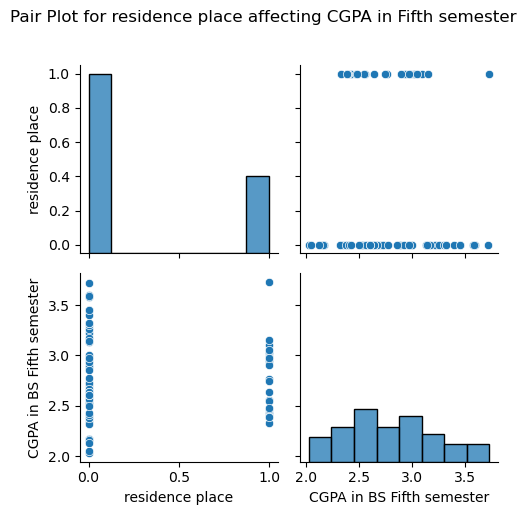

Feature 28


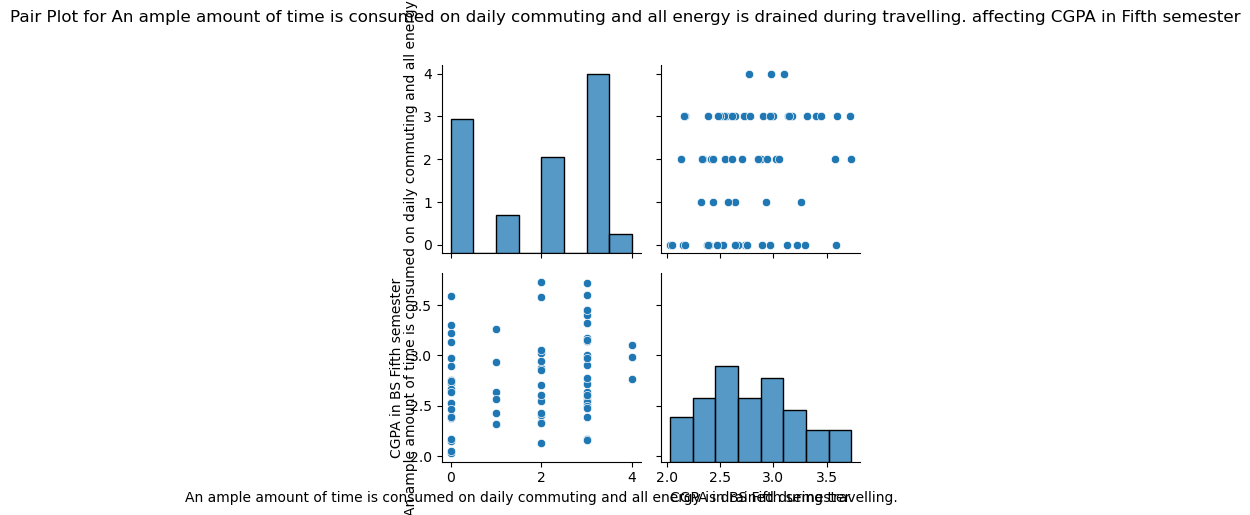

Feature 29


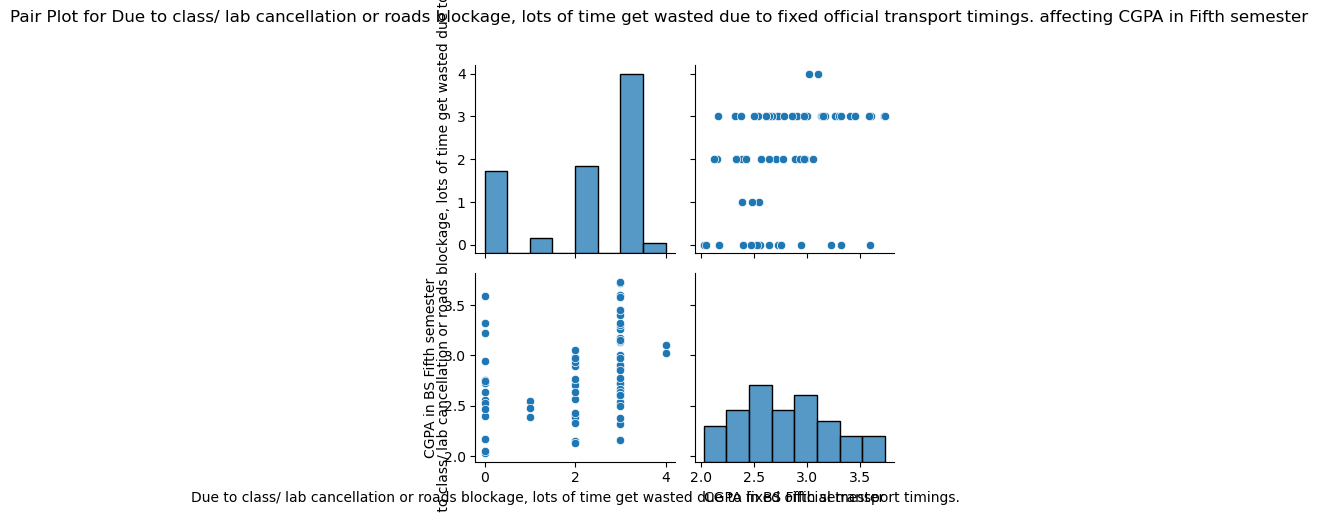

Feature 30


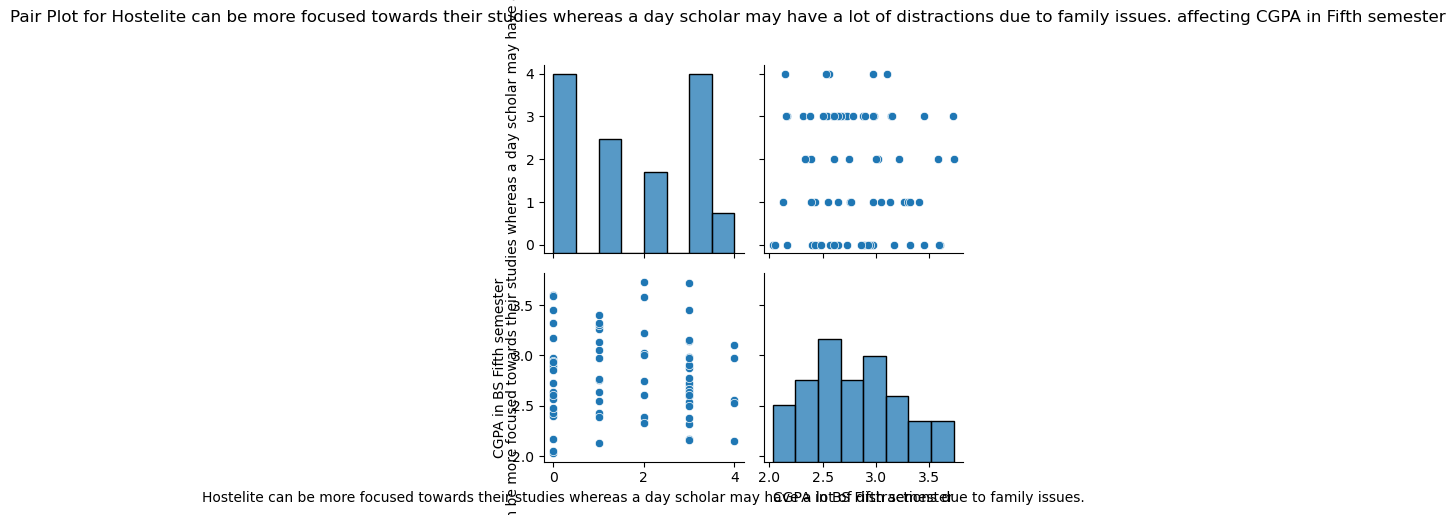

Feature 31


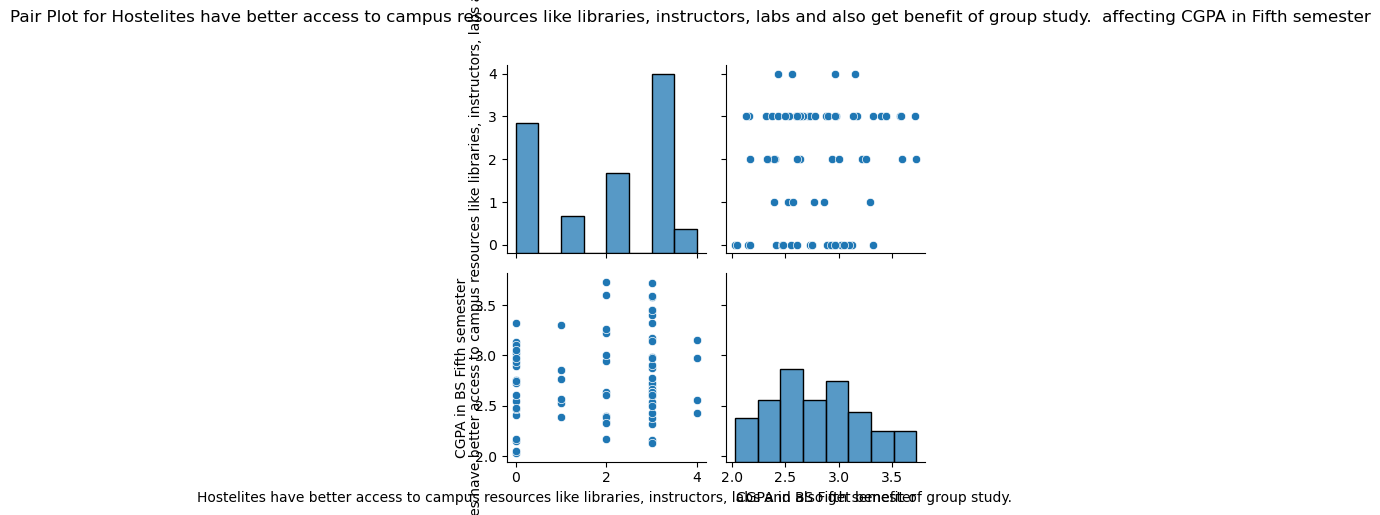

Feature 32


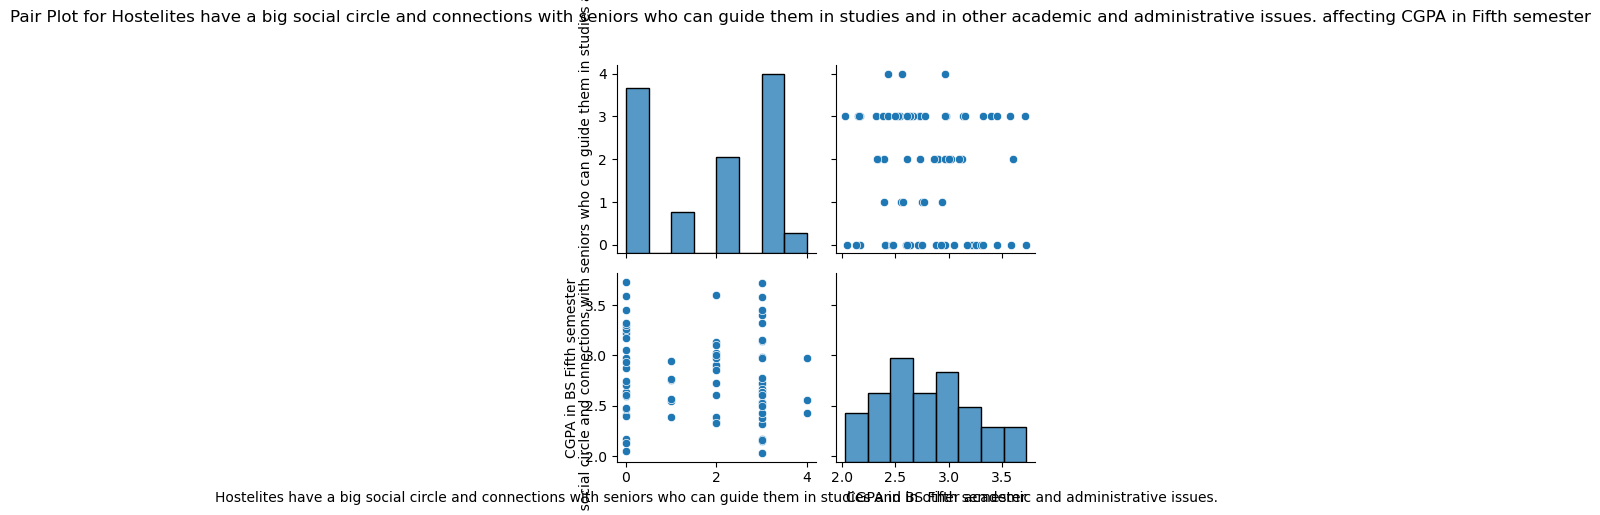

Feature 33


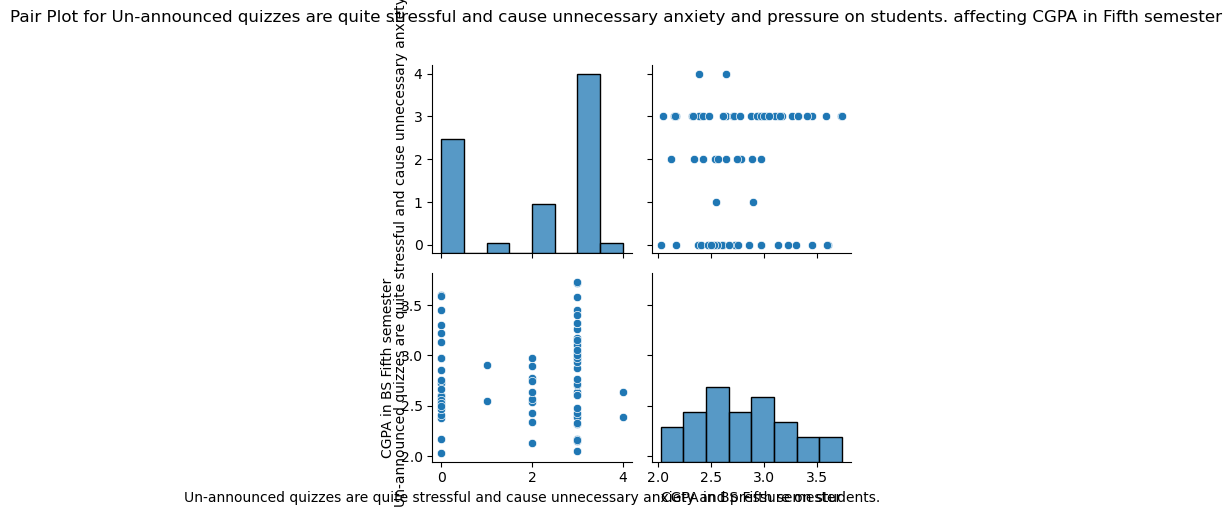

Feature 34


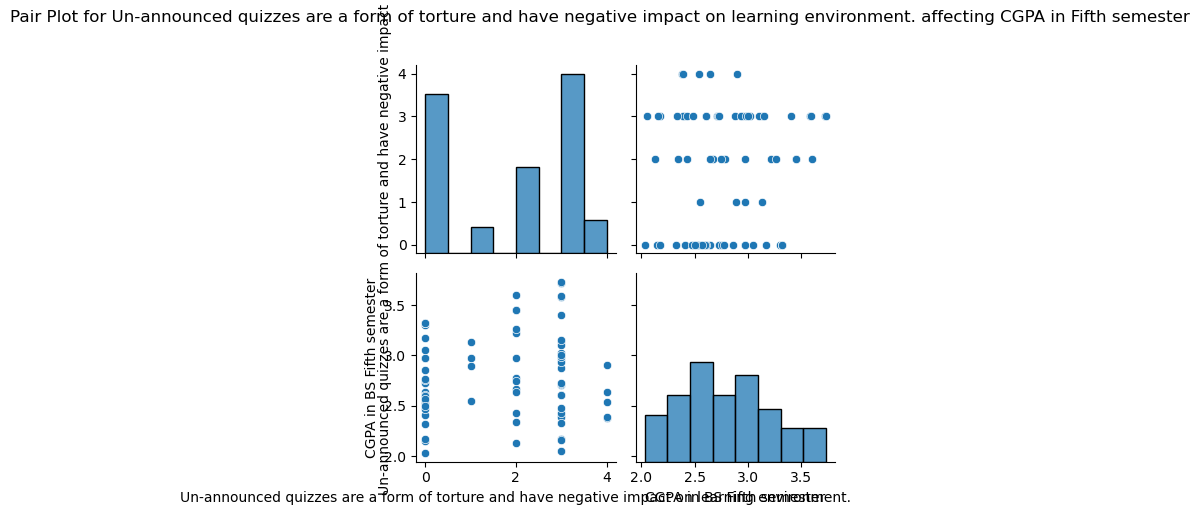

Feature 35


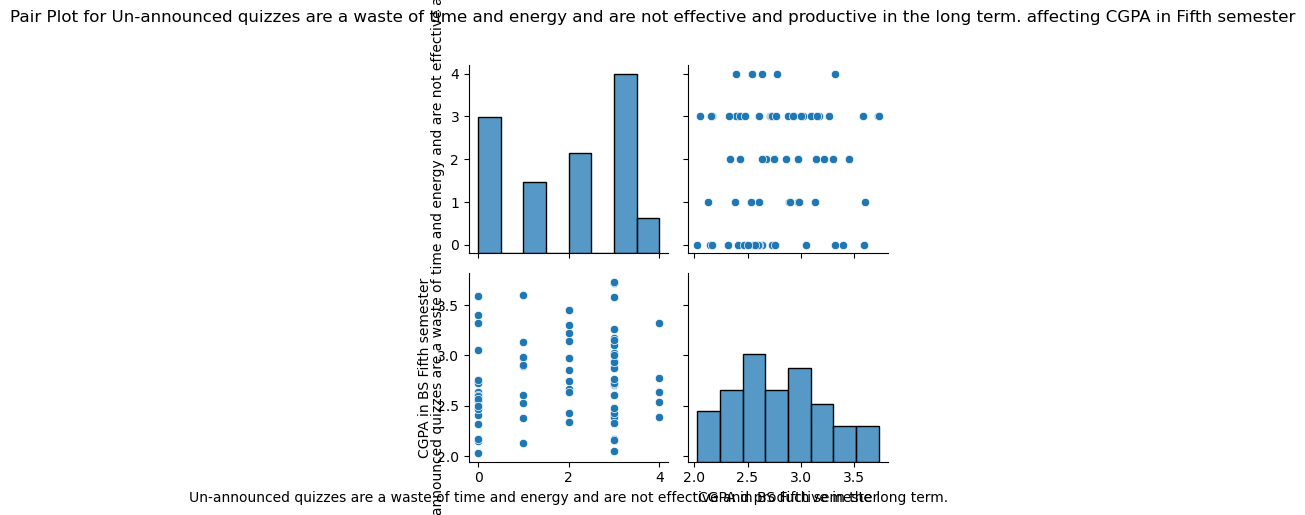

Feature 36


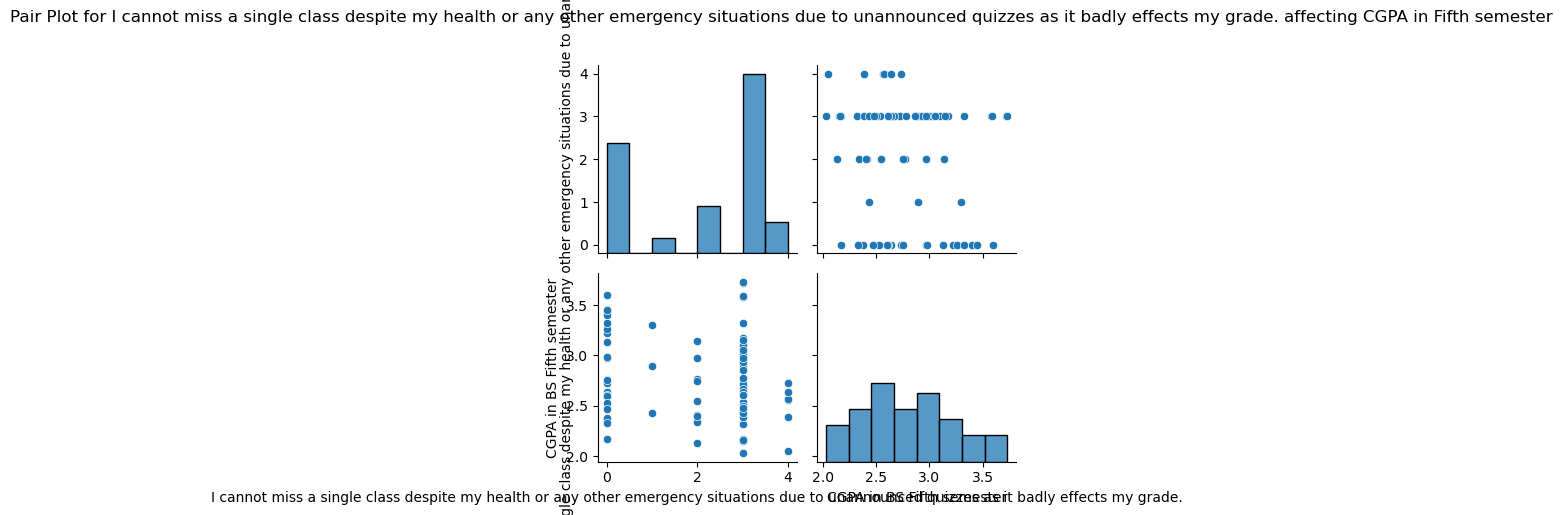

Feature 37


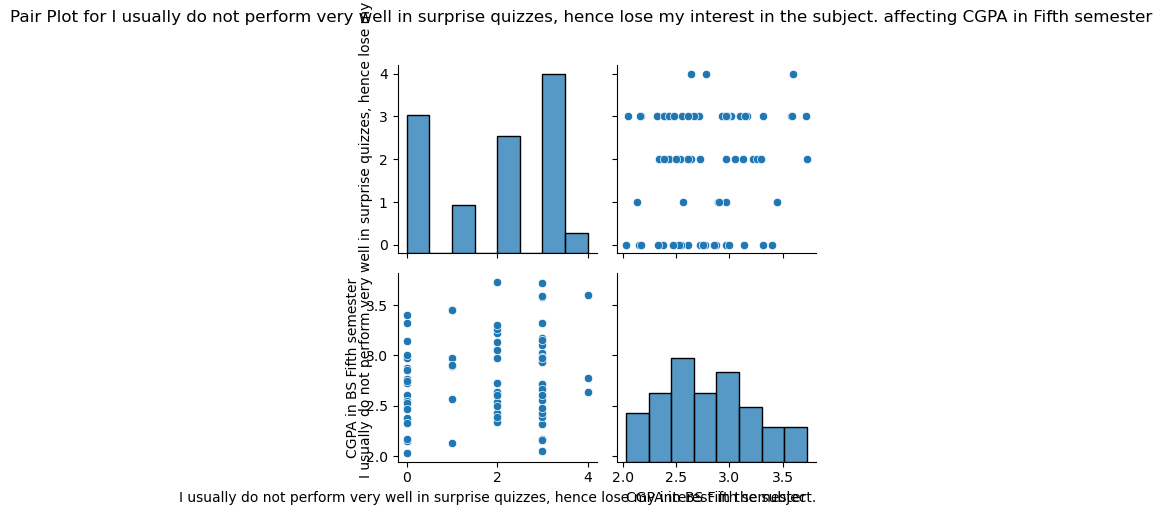

Feature 38


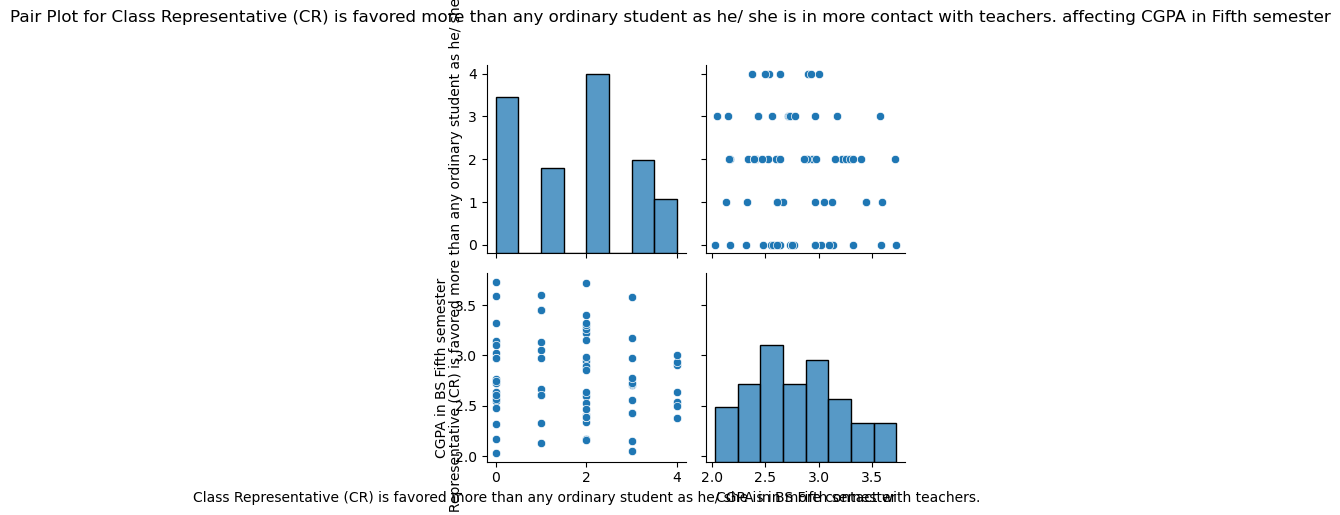

Feature 39


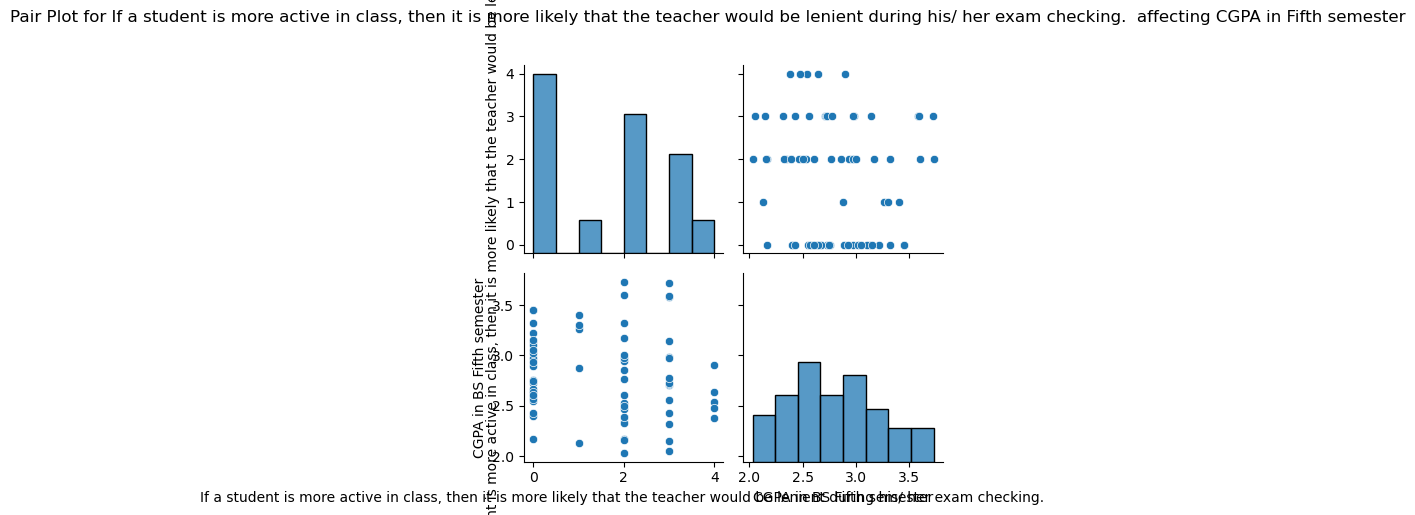

Feature 40


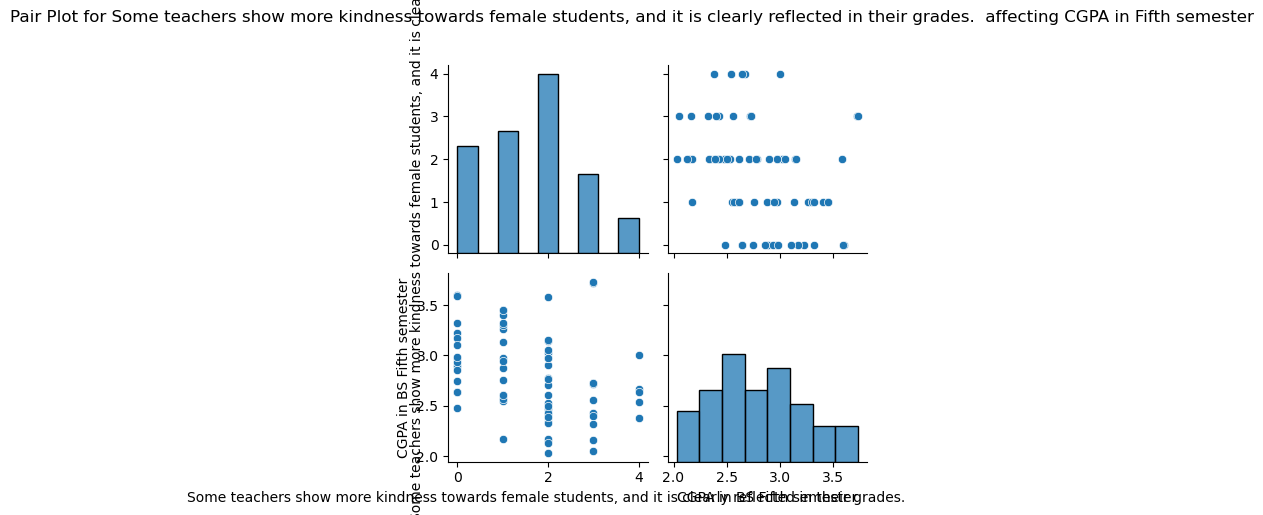

Feature 41


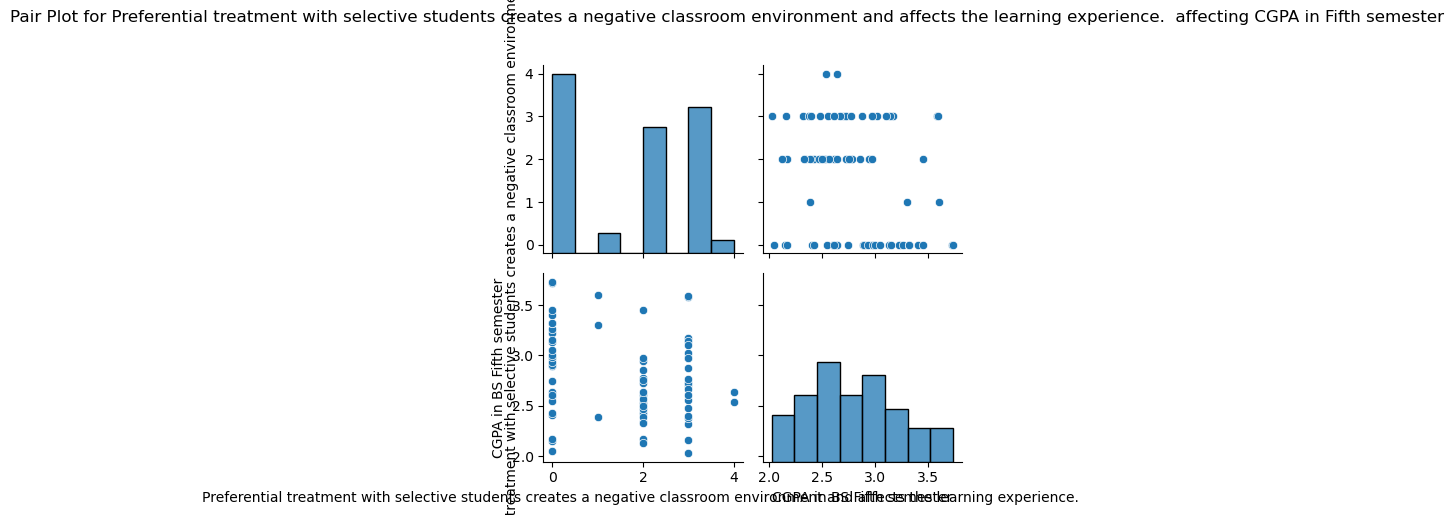

Feature 42


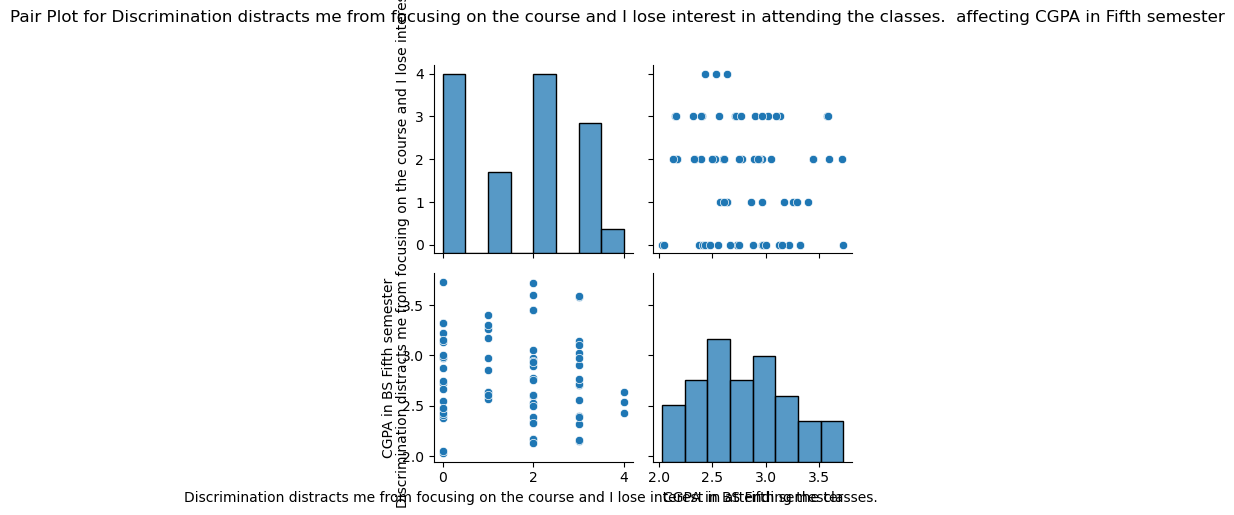

Feature 43


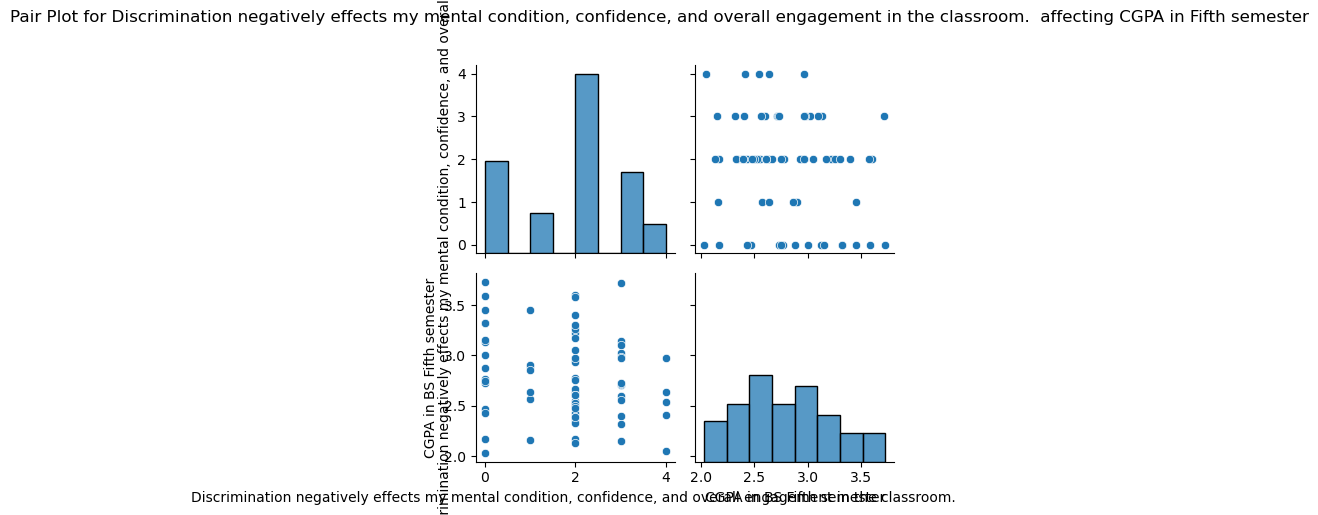

Feature 44


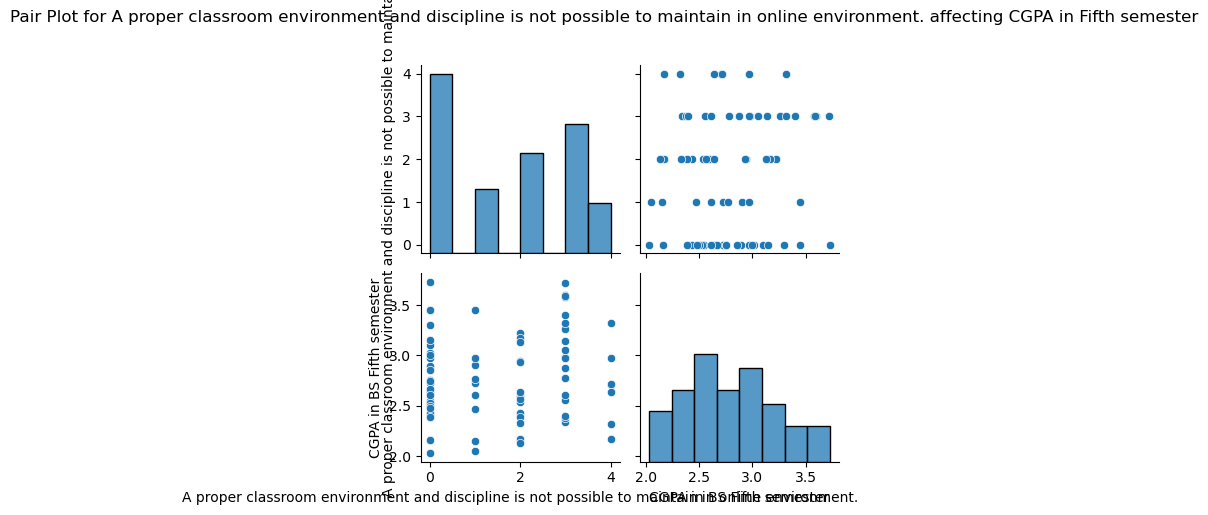

Feature 45


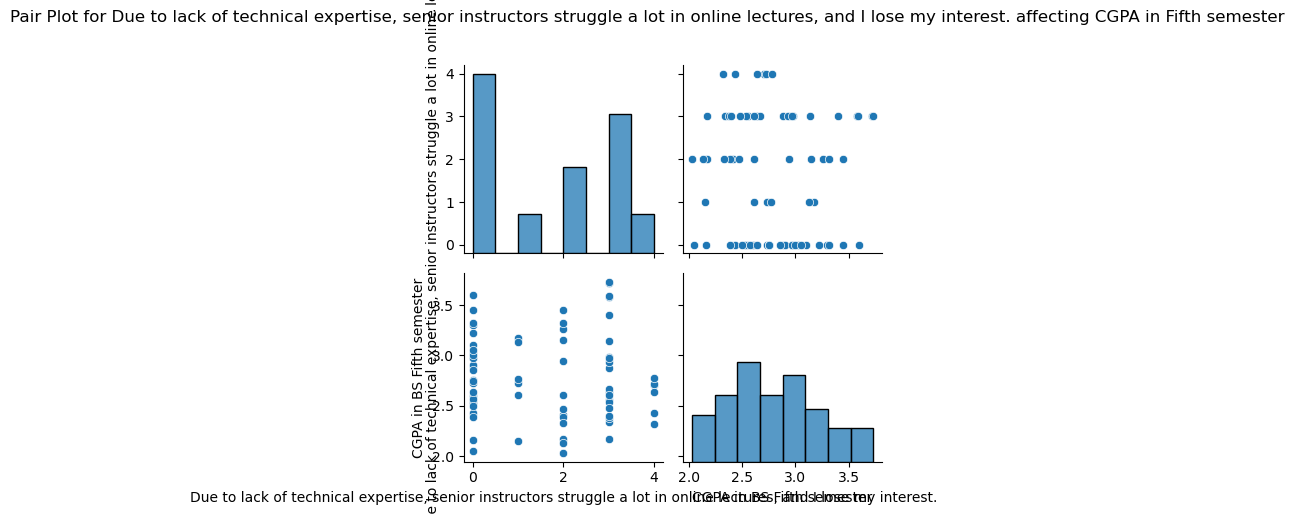

Feature 46


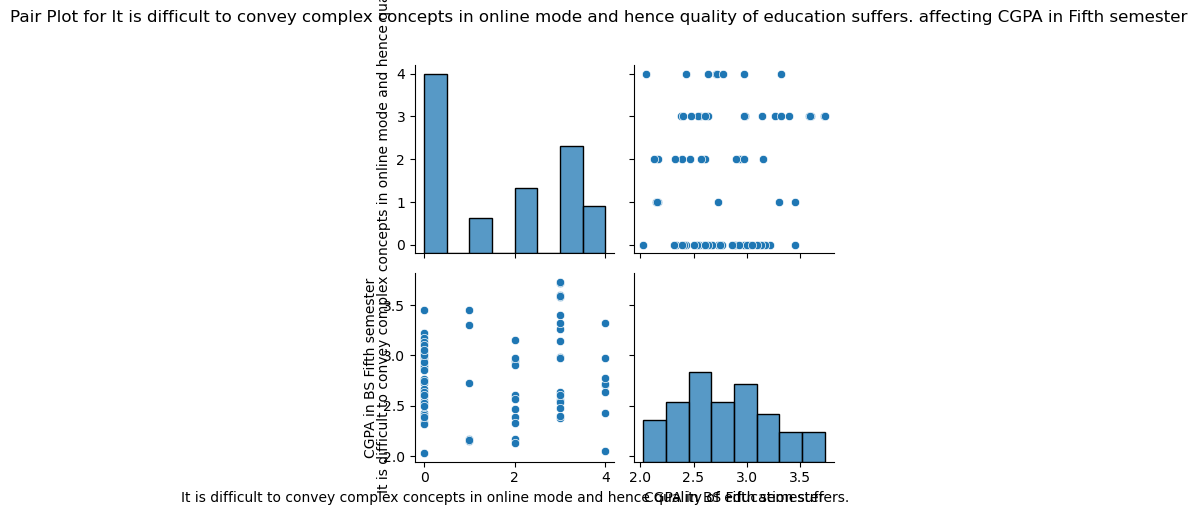

Feature 47


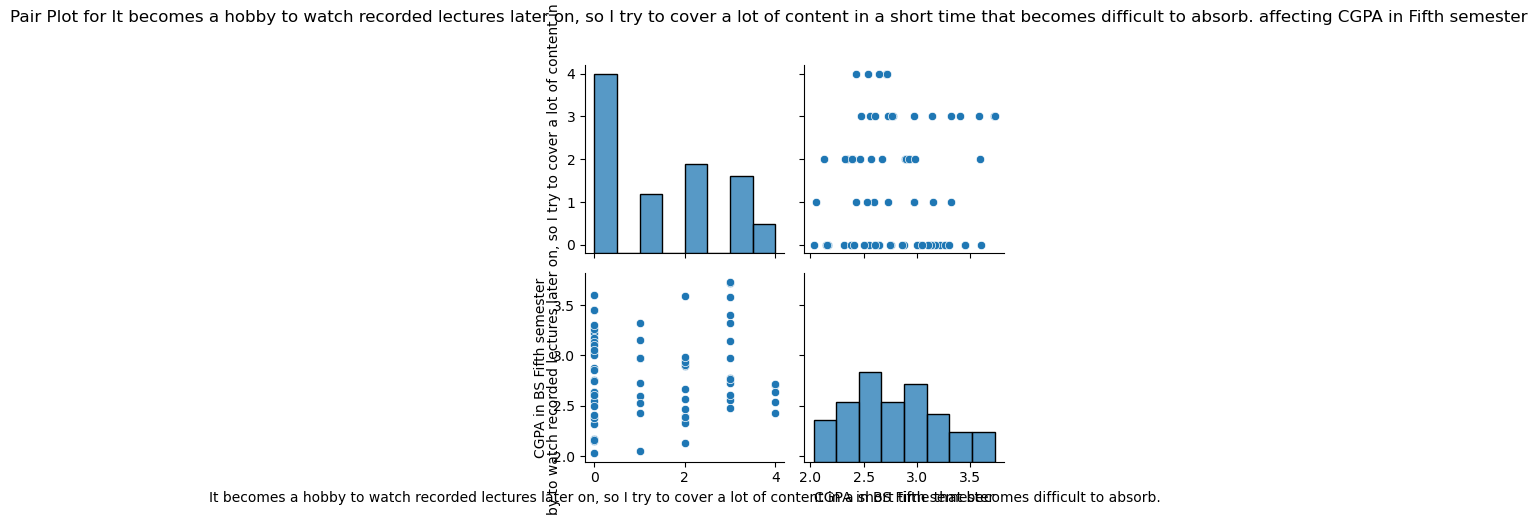

Feature 48


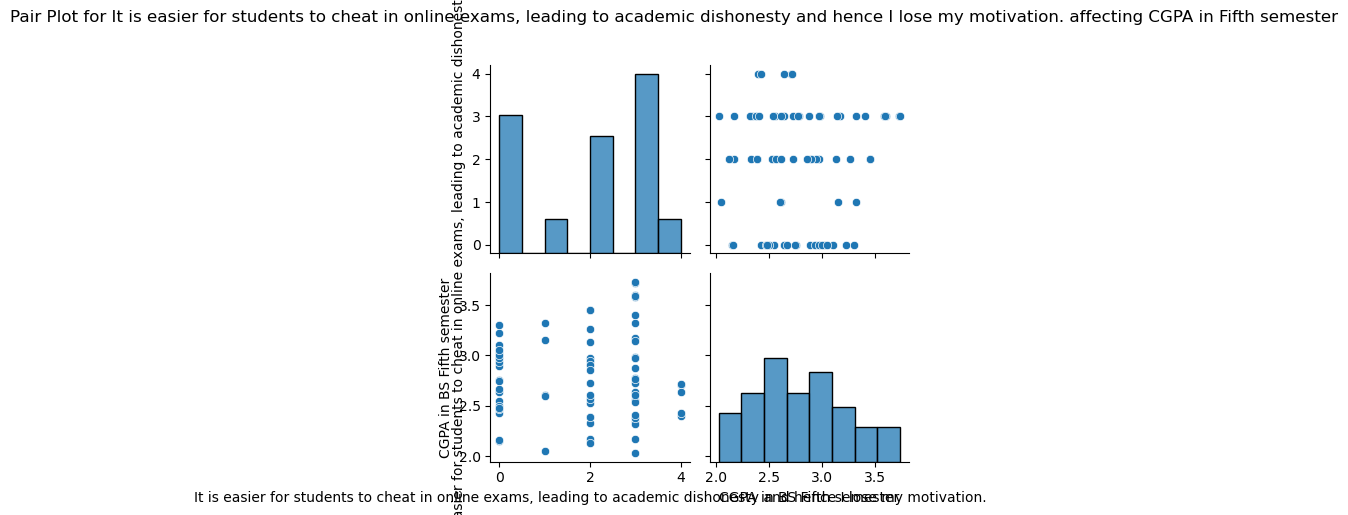

Feature 49


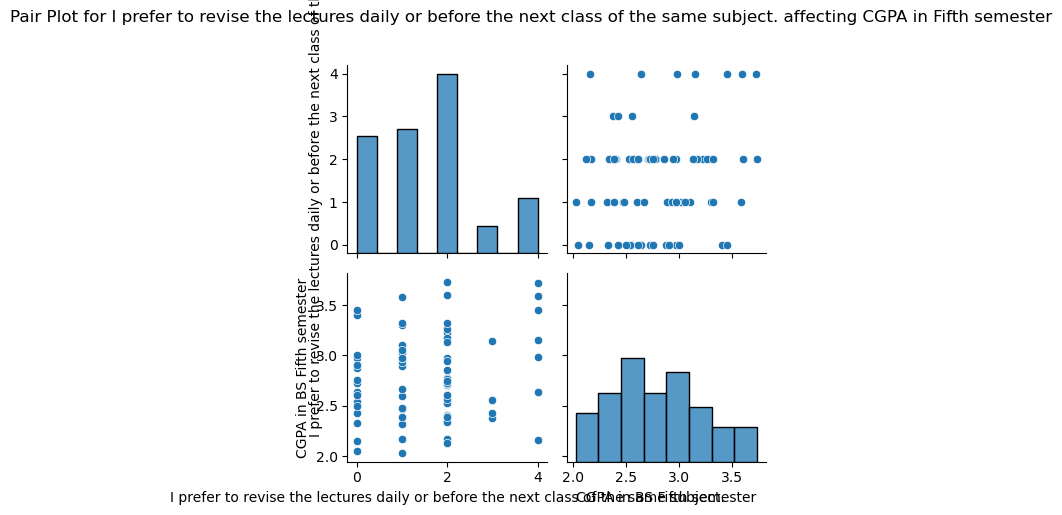

Feature 50


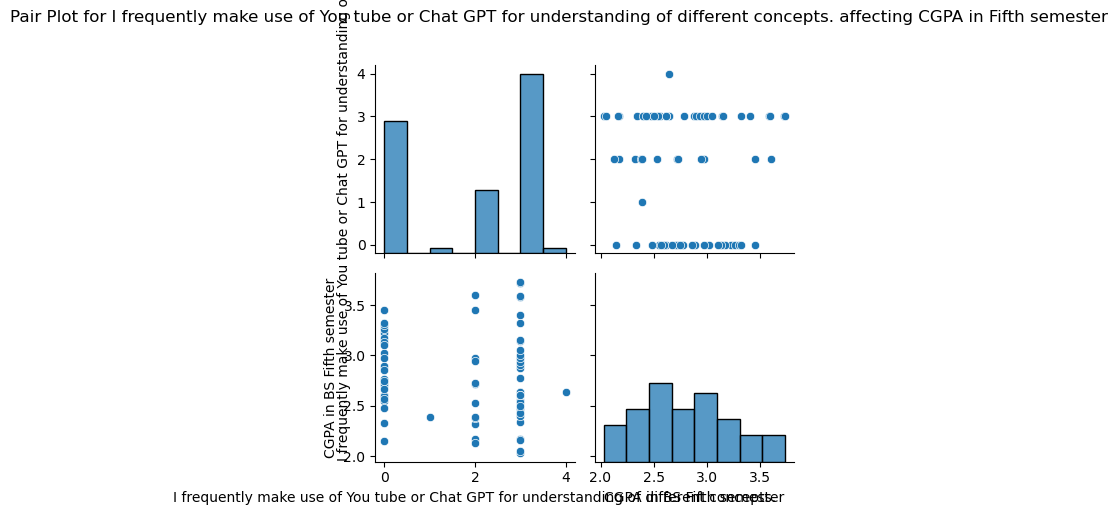

Feature 51


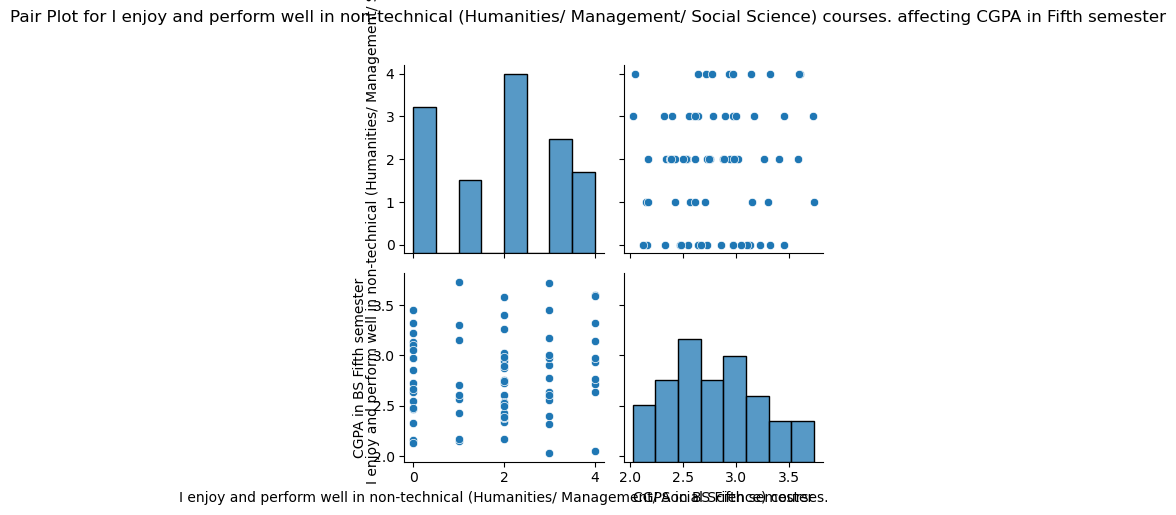

Feature 52


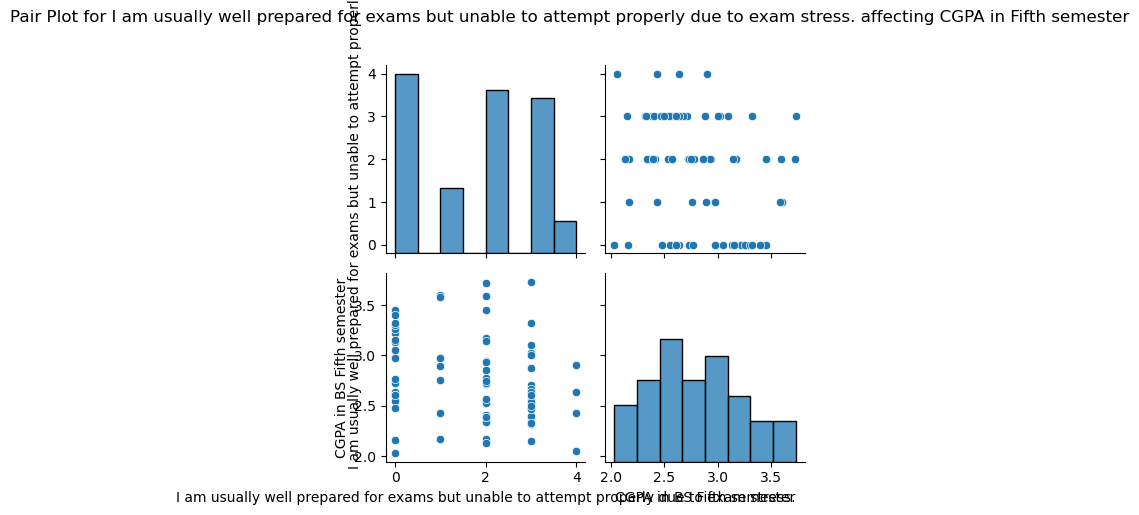

Feature 53


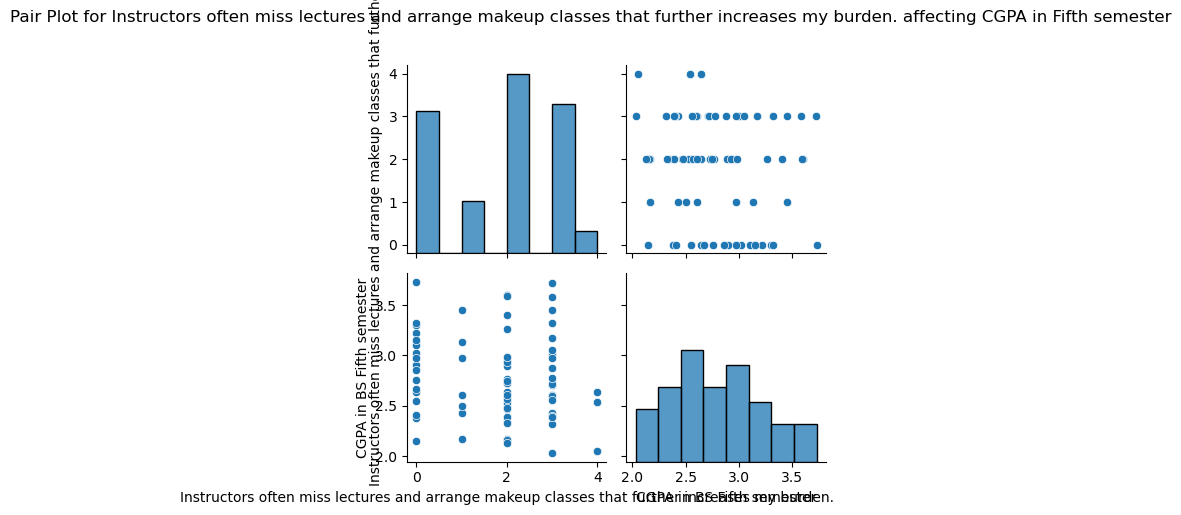

Feature 54


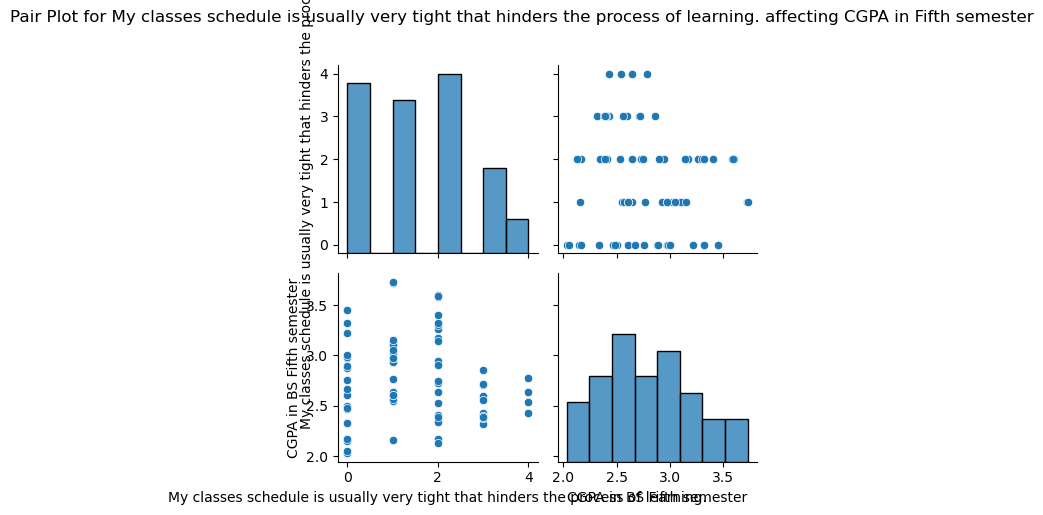

Feature 55


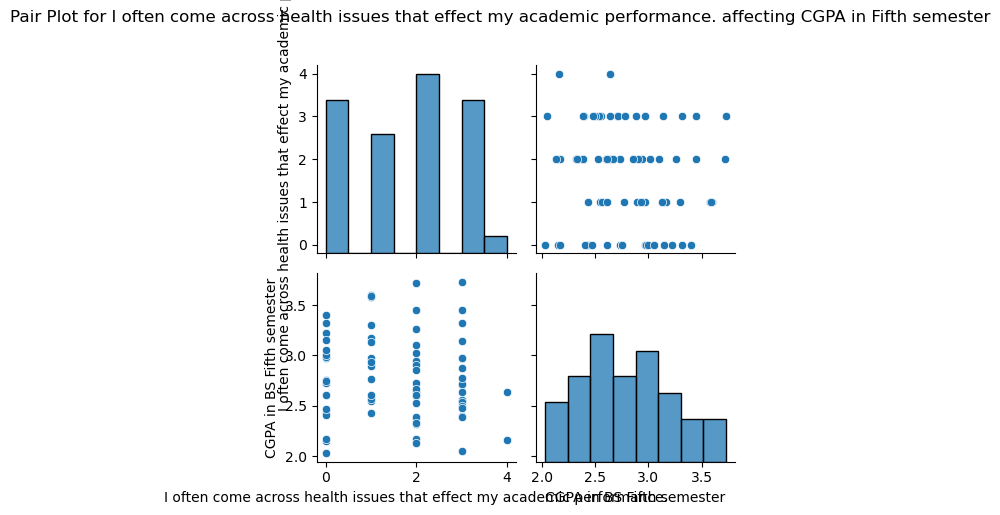

Feature 56


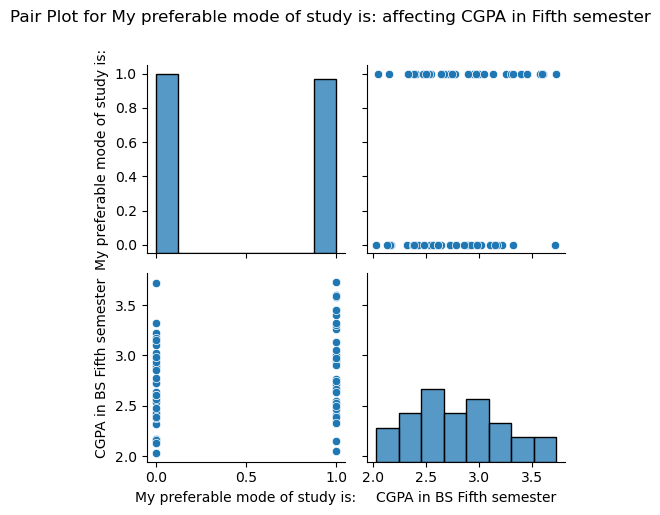

Feature 57


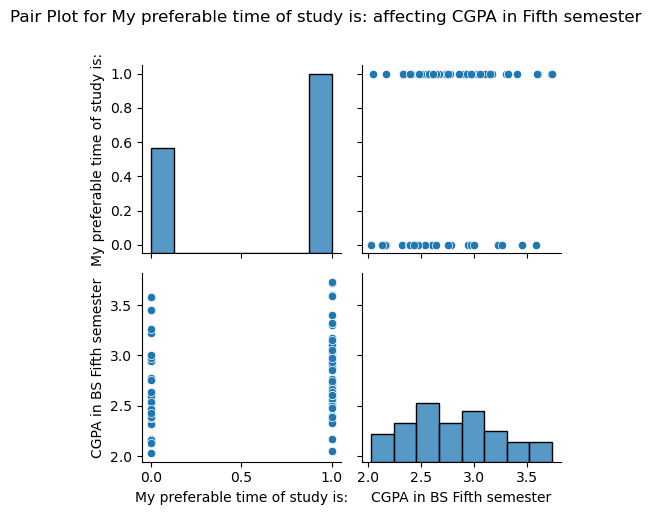

Feature 58


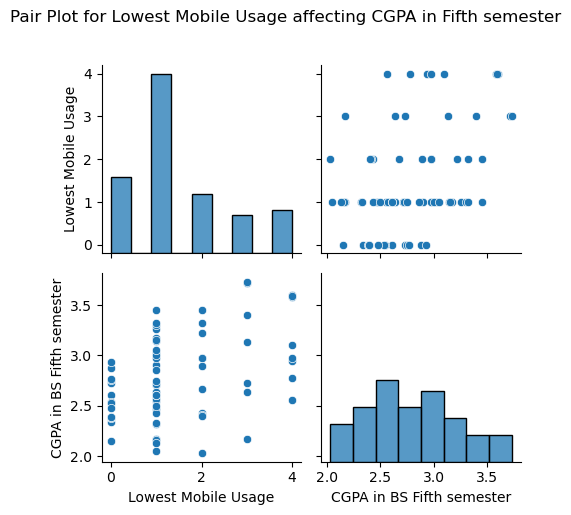

Feature 59


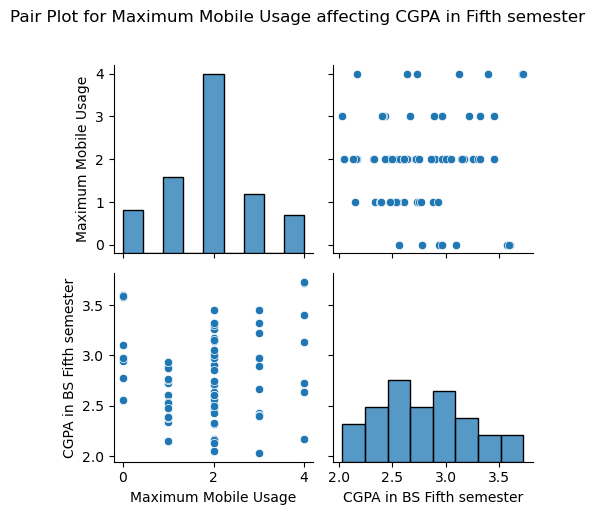

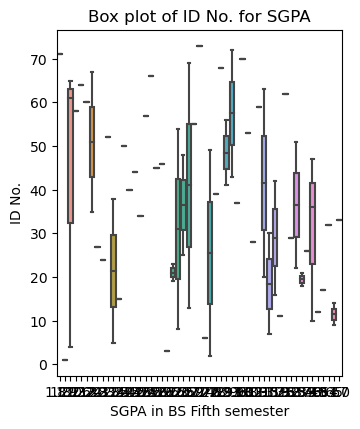

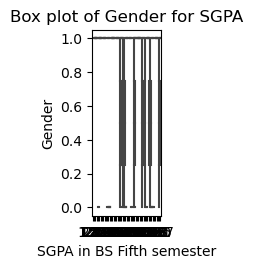

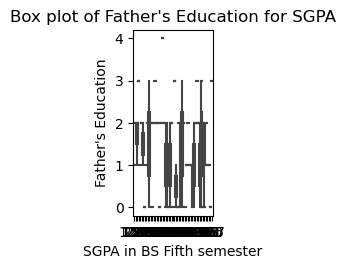

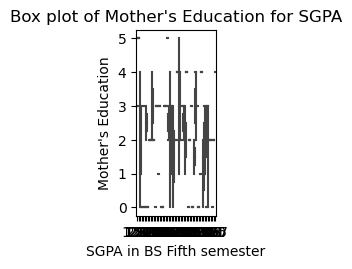

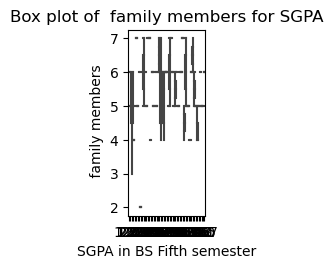

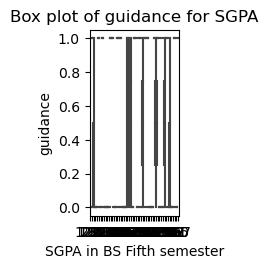

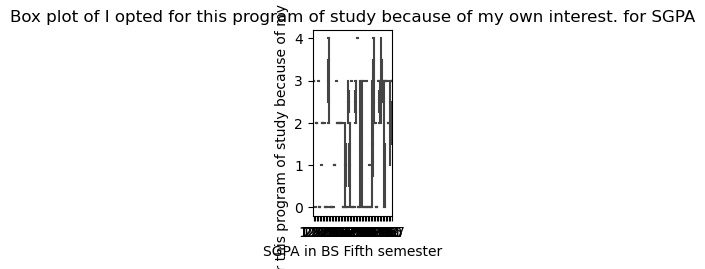

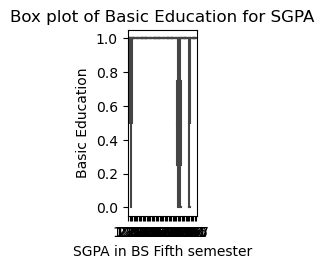

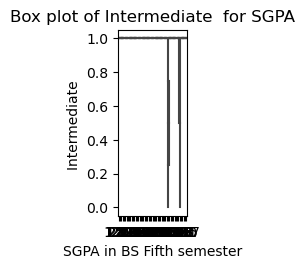

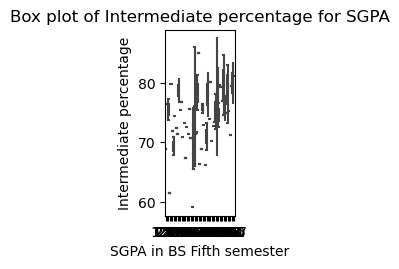

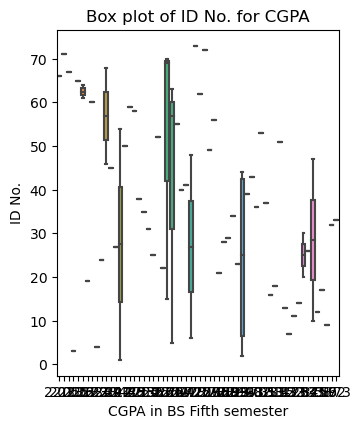

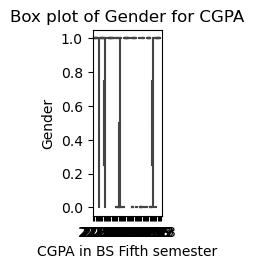

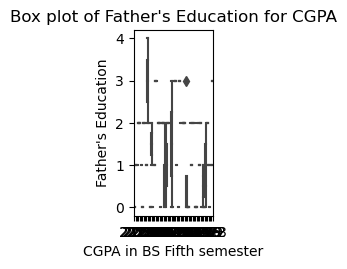

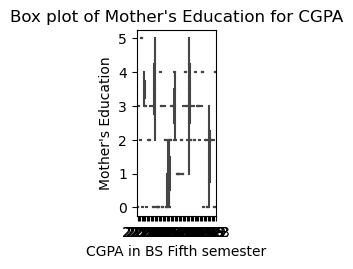

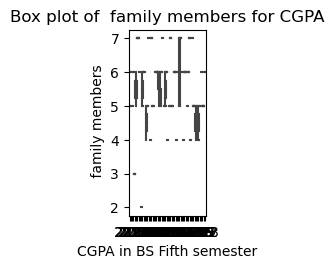

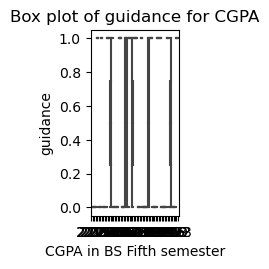

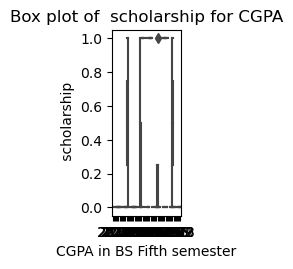

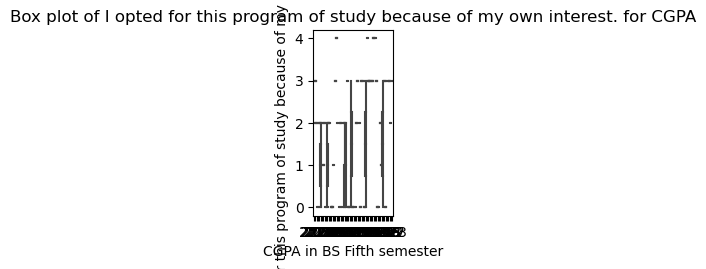

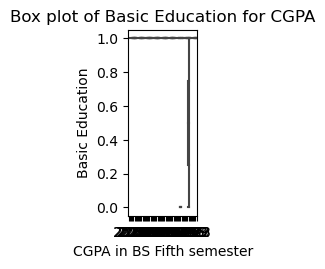

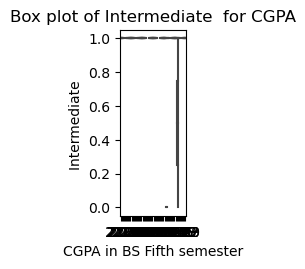

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# Load the dataset
df = pd.read_csv('modified_csv.csv')

# Handle missing values
df = df.dropna()
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
# Encode categorical variables if any and print the mapping
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    original_values = df[col].unique()
    encoded_values = label_encoder.fit_transform(original_values)
    
    print(f"\nEncoding for {col}:")
    for original, encoded in zip(original_values, encoded_values):
        print(f"{original} -> {encoded}")
    
    df[col] = label_encoder.transform(df[col])

# Identify features and target variables
features = df.drop(['SGPA in BS Fifth semester', 'CGPA in BS Fifth semester'], axis=1)
target_sgpa = df['SGPA in BS Fifth semester']
target_cgpa = df['CGPA in BS Fifth semester']

# Select top features using SelectKBest and f_regression
num_features = 60
selector_sgpa = SelectKBest(score_func=f_regression, k=num_features)
selector_cgpa = SelectKBest(score_func=f_regression, k=num_features)

X_sgpa = features.copy()
X_cgpa = features.copy()

X_sgpa = X_sgpa.apply(lambda col: label_encoder.fit_transform(col) if col.name in categorical_columns else col)
X_cgpa = X_cgpa.apply(lambda col: label_encoder.fit_transform(col) if col.name in categorical_columns else col)

X_sgpa = selector_sgpa.fit_transform(X_sgpa, target_sgpa)
X_cgpa = selector_cgpa.fit_transform(X_cgpa, target_cgpa)

top_features_sgpa = features.columns[selector_sgpa.get_support()]
top_features_cgpa = features.columns[selector_cgpa.get_support()]

# Print top 60 features
print("Top 60 Features affecting SGPA in Fifth semester:")
print(top_features_sgpa)

print("\nTop 60 Features affecting CGPA in Fifth semester:")
print(top_features_cgpa)
i=0
j=0
# Visualize relationships with pair plots for SGPA
for feature in top_features_sgpa:
    print("Feature", i) 
    sns.pairplot(df[[feature, 'SGPA in BS Fifth semester']])
    plt.suptitle(f'Pair Plot for {feature} affecting SGPA in Fifth semester', y=1.02)
    plt.tight_layout()
    plt.show()
    i=i+1

# Visualize relationships with pair plots for CGPA
for feature in top_features_cgpa:
    print("Feature", j)
    sns.pairplot(df[[feature, 'CGPA in BS Fifth semester']])
    plt.suptitle(f'Pair Plot for {feature} affecting CGPA in Fifth semester', y=1.02)
    plt.tight_layout()
    plt.show()
    j=j+1
    


# Visualize relationships with box plots for SGPA
plt.figure(figsize=(16, 8))
for i, feature in enumerate(top_features_sgpa[:min(len(top_features_sgpa), 10)]):
    plt.subplot(2, 5, i+1)
    sns.boxplot(x=target_sgpa, y=df[feature])
    plt.title(f'Box plot of {feature} for SGPA')
    plt.tight_layout()
    plt.show()

# Visualize relationships with box plots for CGPA
plt.figure(figsize=(16, 8))
for i, feature in enumerate(top_features_cgpa[:min(len(top_features_cgpa), 10)]):
    plt.subplot(2, 5, i+1)
    sns.boxplot(x=target_cgpa, y=df[feature])
    plt.title(f'Box plot of {feature} for CGPA')
    plt.tight_layout()
    plt.show()


# Saving the useful features in new csv file 

In [9]:
# Assuming top_features_sgpa and top_features_cgpa are lists of selected features
selected_features = list(set(top_features_sgpa).union(top_features_cgpa))
print(selected_features) 
# Select only the columns present in selected_features
df_final = df[selected_features + ['SGPA in BS Fifth semester', 'CGPA in BS Fifth semester']]

# Save the final DataFrame to a new CSV file
df_final.to_csv('final_with_encoding.csv', index=False)

['I cannot miss a single class despite my health or any other emergency situations due to unannounced quizzes as it badly effects my grade.', 'Discrimination negatively effects my mental condition, confidence, and overall engagement in the classroom. ', 'Matric percentage', 'It is difficult to convey complex concepts in online mode and hence quality of education suffers.', 'Hostelites have a big social circle and connections with seniors who can guide them in studies and in other academic and administrative issues.', 'I opted for this program of study because of my own interest.', "TVFs are not aware of the university's curriculum and other requirements.", 'It is easier for students to cheat in online exams, leading to academic dishonesty and hence I lose my motivation.', 'TVFs are not very well prepared for the lectures due to their busy schedule.', 'Discrimination distracts me from focusing on the course and I lose interest in attending the classes. ', 'It becomes a hobby to watch re

# Model Training and Evaluation


loading completed

Features Selection  completed

Spliting is completed

5 models are Initialized

combining models completed

Training completed

model saving completed
Mean Squared Error for rf: 0.0994574877272729
Mean Squared Error for gb: 0.1250105602972082
Mean Squared Error for ab: 0.11733556797297579
Mean Squared Error for bg: 0.1276785
Mean Squared Error for rf2: 0.0994574877272729
Mean Squared Error for ensemble: 0.11000241855840193

Model Evaluation completed
Predicted SGPA on the test set: 2.9205854756804817


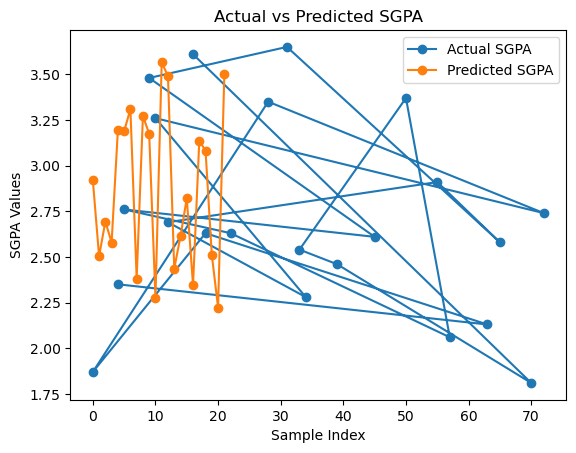

Mean Squared Error: 0.11
Mean Absolute Error: 0.27
R-squared: 0.61


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import ConfusionMatrixDisplay
import joblib

# Load the final dataset
df_final = pd.read_csv('final_with_encoding.csv')
print("\nloading completed")
# Define features and target variables
# Replace with your actual feature names
selected_features=['SGPA in BS Fourth semester', 'Preferential treatment with selective students creates a negative classroom environment and affects the learning experience. ', 
                   'Due to class/ lab cancellation or roads blockage, lots of time get wasted due to fixed official transport timings.',
                   'Some teachers show more kindness towards female students, and it is clearly reflected in their grades. ', 
                   'It is easier for students to cheat in online exams, leading to academic dishonesty and hence I lose my motivation.',
                   'guidance', 
                   'Hostelites have a big social circle and connections with seniors who can guide them in studies and in other academic and administrative issues.',
                   'TVFs are not very well prepared for the lectures due to their busy schedule.', 'Gender',
                   'Discrimination distracts me from focusing on the course and I lose interest in attending the classes. ',
                   'TVFs grade students according to their own beliefs and criteria and hence my GPA suffers.', 'SGPA in BS First semester',
                   'Due to lack of technical expertise, senior instructors struggle a lot in online lectures, and I lose my interest.',
                   'SGPA in BS Third semester', 'lecture mode', 
                   'I cannot miss a single class despite my health or any other emergency situations due to unannounced quizzes as it badly effects my grade.',
                   'TVFs often reschedule classes that negatively impacts my performance.',
                   "TVFs are not aware of the university's curriculum and other requirements.",
                   'I frequently make use of You tube or Chat GPT for understanding of different concepts.',
                   'Lowest Mobile Usage', 'I usually do not perform very well in surprise quizzes, hence lose my interest in the subject.',
                   'My preferable mode of study is:', 'Basic Education',
                   'Hostelites have better access to campus resources like libraries, instructors, labs and also get benefit of group study. ',
                   'Maximum Mobile Usage', 'Un-announced quizzes are quite stressful and cause unnecessary anxiety and pressure on students.',
                   'I opted for this program of study because of my own interest.', 'number of students',
                   'I prefer to revise the lectures daily or before the next class of the same subject.',
                   'I enjoy and perform well in non-technical (Humanities/ Management/ Social Science) courses.',
                   'I often come across health issues that effect my academic performance.', 'lecture duration',
                   ' scholarship', 'Un-announced quizzes are a waste of time and energy and are not effective and productive in the long term.',
                   'A proper classroom environment and discipline is not possible to maintain in online environment.', "Father's Education",
                   'If a student is more active in class, then it is more likely that the teacher would be lenient during his/ her exam checking. ',
                   ' family members', 'Intermediate ', 'Discrimination negatively effects my mental condition, confidence, and overall engagement in the classroom. ',
                   'Instructors often miss lectures and arrange makeup classes that further increases my burden.',
                   'My classes schedule is usually very tight that hinders the process of learning.', 'sitting place',
                   'TVFs have short-term relations with students and hence do not show sincere behavior to polish my academic skills. ',
                   'residence place', 'Lack of technical resources create disruptions during lectures and make it difficult to understand. ',
                   'I am usually well prepared for exams but unable to attempt properly due to exam stress.',
                   'Hostelite can be more focused towards their studies whereas a day scholar may have a lot of distractions due to family issues.',
                   'It becomes a hobby to watch recorded lectures later on, so I try to cover a lot of content in a short time that becomes difficult to absorb.',
                   ' lecture language', 'TVFs do not provide assessment results timely so I remain unaware of my standing in class.',
                   'I am easily distracted by social media and other sources of interruptions during online lectures.', 'My preferable time of study is:', 'Intermediate percentage',
                   'Class Representative (CR) is favored more than any ordinary student as he/ she is in more contact with teachers.', 'SGPA in BS Second semester', 'attendance',
                   'An ample amount of time is consumed on daily commuting and all energy is drained during travelling.',
                   'TVFs are very difficult to access after class timings and hence I am unable to clarify my concepts.',
                   'lecture material', 'It is difficult to convey complex concepts in online mode and hence quality of education suffers.'
                   , 'Matric percentage', "Mother's Education"
                   , 'Un-announced quizzes are a form of torture and have negative impact on learning environment.']
X = df_final[selected_features]

y_sgpa = df_final['SGPA in BS Fifth semester']
y_cgpa = df_final['CGPA in BS Fifth semester']
print("\nFeatures Selection  completed")
# Split the data into training and testing sets
X_train, X_test, y_sgpa_train, y_sgpa_test, y_cgpa_train, y_cgpa_test = train_test_split(
    X, y_sgpa, y_cgpa, test_size=0.3, random_state=42
)
print("\nSpliting is completed")
# Initialize five different regressors
rf_regressor = RandomForestRegressor(random_state=42)
gb_regressor = GradientBoostingRegressor(random_state=42)
ab_regressor = AdaBoostRegressor(random_state=42)
bg_regressor = BaggingRegressor(random_state=42)
rf_regressor_2 = RandomForestRegressor(random_state=42)  # Additional RandomForestRegressor
print("\n5 models are Initialized")
# Combine models using VotingRegressor
ensemble_regressor = VotingRegressor(estimators=[
    ('rf', rf_regressor),
    ('gb', gb_regressor),
    ('ab', ab_regressor),
    ('bg', bg_regressor),
    ('rf2', rf_regressor_2)
])
print("\ncombining models completed")
# Train the models
rf_regressor.fit(X_train, y_sgpa_train)
gb_regressor.fit(X_train, y_sgpa_train)
ab_regressor.fit(X_train, y_sgpa_train)
bg_regressor.fit(X_train, y_sgpa_train)
rf_regressor_2.fit(X_train, y_sgpa_train)
ensemble_regressor.fit(X_train, y_sgpa_train)
print("\nTraining completed")
# Save the models
models = {
    'rf': rf_regressor,
    'gb': gb_regressor,
    'ab': ab_regressor,
    'bg': bg_regressor,
    'rf2': rf_regressor_2,
    'ensemble': ensemble_regressor
}

for name, model in models.items():
    joblib.dump(model, f'{name}_model.pkl')
print("\nmodel saving completed")
# Evaluate the models
for name, model in models.items():
    y_sgpa_pred = model.predict(X_test)
    mse = mean_squared_error(y_sgpa_test, y_sgpa_pred)
    print(f'Mean Squared Error for {name}: {mse}')
print("\nModel Evaluation completed")
# Now, you can use the models for predictions
# For example, to predict SGPA using the ensemble model:
# Use the test dataset to make predictions
sgpa_prediction_test = ensemble_regressor.predict(X_test)

# Print the predicted SGPA for the first instance in the test set
print(f'Predicted SGPA on the test set: {sgpa_prediction_test[0]}')
# Plot actual vs predicted values as a line graph
plt.plot(y_sgpa_test, label='Actual SGPA', marker='o')
plt.plot(sgpa_prediction_test, label='Predicted SGPA', marker='o')
plt.xlabel('Sample Index')
plt.ylabel('SGPA Values')
plt.title('Actual vs Predicted SGPA')
plt.legend()
plt.show()

# Print performance metrics for regression
mse = mean_squared_error(y_sgpa_test, sgpa_prediction_test)
mae = mean_absolute_error(y_sgpa_test, sgpa_prediction_test)
r2 = r2_score(y_sgpa_test, sgpa_prediction_test)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')


In [11]:
# Use the test dataset to make predictions for both SGPA and CGPA
sgpa_prediction_test = rf_regressor_2.predict(X_test)

# Print the predicted SGPA and CGPA for the first instance in the test set
print(f'Predicted SGPA on the test set: {sgpa_prediction_test[0]}')
cgpa_prediction_test = models['ensemble'].estimators_[1].predict(X_test)  # Replace 1 with the index of the CGPA model
print(f'Predicted CGPA on the test set: {cgpa_prediction_test[0]}')
print("\n",sgpa_prediction_test[0],"\n",cgpa_prediction_test[0],"\n",X_test)

Predicted SGPA on the test set: 2.9019000000000013
Predicted CGPA on the test set: 3.0007940450690724

 2.9019000000000013 
 3.0007940450690724 
     SGPA in BS Fourth semester  \
4                         2.74   
63                        1.46   
18                        2.58   
0                         1.98   
28                        3.17   
72                        3.04   
10                        3.20   
34                        2.05   
12                        3.13   
55                        3.15   
65                        1.63   
31                        3.76   
9                         3.04   
45                        2.24   
5                         2.46   
22                        2.63   
57                        2.09   
50                        3.30   
33                        2.87   
39                        2.09   
70                        2.07   
16                        3.58   

    Preferential treatment with selective students creates a negative c

In [12]:
# Save X_test to a CSV file
X_test.to_csv('X_test.csv', index=False)